In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from pmdarima.arima import ADFTest
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [160]:
import sys
print(sys.path)

['/Users/laibohan/Desktop/Gatech/Visualization', '/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python38.zip', '/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8', '/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/lib-dynload', '', '/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages', '/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/IPython/extensions', '/Users/laibohan/.ipython']


In [161]:
df = pd.read_csv("housing_state.csv")
df.head()

,state,period_begin,total_homes_sold,total_value,AVG_median_sales_price
0,AK,2017-01-02,81.0,21202000.0,261753.086420
1,AK,2017-01-09,95.0,28384895.0,298788.368421
2,AK,2017-01-16,86.0,22529900.0,261975.581395
3,AK,2017-01-23,105.0,26613000.0,253457.142857
4,AK,2017-01-30,116.0,32739500.0,282237.068966


In [162]:
def create_each_state(state,split_date = "2020-03-01",vali_date = "2019-08-05" ):
    agg = df[df["state"]==state]
    split_date = split_date
    vali_date = vali_date
    test = agg[agg.period_begin >=split_date]
    train = agg[agg.period_begin < vali_date]
    val = agg[(agg.period_begin >=vali_date)&(agg.period_begin<split_date)]
    return train, val, test

In [163]:
train,val,test = create_each_state("TX")

print(train.shape)
print(val.shape)
print(test.shape)

(135, 5)
(30, 5)
(33, 5)


In [167]:
print("p-value:", adfuller(train.total_value.dropna())[1])
print("p-value:", adfuller(train.total_homes_sold.dropna())[1])
print("p-value:", adfuller(train.AVG_median_sales_price.dropna())[1])

p-value: 0.09211727370720535
p-value: 0.10997367162040106
p-value: 0.069131559578302


In [164]:
def create_arima_model_2(train,val,arima_order):
    
    model = ARIMA(train,order = arima_order)
    results = model.fit()
    pred = results.forecast(len(val))[0]
    
    error = mean_squared_error(val,pred)
    return error,pred
    
e, pre = create_arima_model_2(train.total_value,val.total_value,(3,1,2))

In [165]:
p_l = range(0,5)
d_l = range(1,4)
q_l = range(0,4)


def find_p_d_q(train,val,p_1,d_1,q_1):
    best = float("inf")
    best_combination = (0,0,0)
    for p in p_l:
        for d in d_l:
            for q in q_l:
                com = (p,d,q)
                try:
                    error, pred= create_arima_model_2(train,val,com)
                    if error < best:
                        best, best_combination = error, com
                    #print("ARIMA.{} mse = {}".format(com,error))
                except:
                    continue
    print("MSE is {}, when p,d,q are {}".format(best,best_combination))
    return best_combination

In [166]:
best = find_p_d_q(train.total_value,val.total_value,p_l,d_l,q_l)

MSE is 5.3279018049461926e+17, when p,d,q are (4, 1, 3)


In [4]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              d=1,
                            start_p=0, 
                              start_q=0,
                              test="adf",         
                              seasonal=True,
                              stepwise=False,m=52,trace=True)
    return autoarima_model

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3278.946, Time=0.40 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3266.048, Time=3.10 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3267.841, Time=8.03 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3270.659, Time=1.91 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3267.859, Time=3.76 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3269.841, Time=7.67 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3267.889, Time=6.63 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3269.859, Time=7.31 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3271.841, Time=8.60 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3250.328, Time=0.50 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3247.188, Time=2.95 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3249.173, Time=28.68 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3247.177, Time=2.71 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3249.173, Time=6.20 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3251.173, Time=22.

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(2,1,2)[52]             : AIC=3252.010, Time=67.05 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=3251.668, Time=0.42 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=3248.280, Time=2.77 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=3250.261, Time=18.13 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=3248.365, Time=4.20 sec
 ARIMA(0,1,2)(1,1,1)[52]             : AIC=3250.260, Time=9.58 sec
 ARIMA(0,1,2)(1,1,2)[52]             : AIC=3252.261, Time=23.28 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=3250.261, Time=13.84 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=3252.261, Time=20.06 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3249.393, Time=0.87 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3246.303, Time=5.60 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3248.097, Time=21.36 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=3246.488, Time=5.26 sec
 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3248.088, Time=8.56 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3248.099, Tim

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3248.388, Time=5.69 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3254.178, Time=1.21 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3250.064, Time=5.07 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3250.336, Time=6.78 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3252.814, Time=6.38 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3255.397, Time=3.36 sec
Total fit time: 983.648 seconds


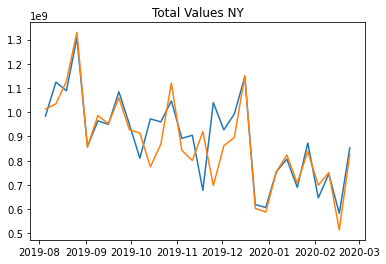

98210340.2558234


In [5]:
train,val,test = create_each_state("NY")
arima_model = arimamodel(train.total_value)
predictions = arima_model.predict(30)
plt.plot(pd.to_datetime(val.period_begin),predictions)
plt.plot(pd.to_datetime(val.period_begin),val.total_value)
plt.title("Total Values NY")

plt.show()
rms = np.sqrt(mean_squared_error(val.total_value,predictions))

print(rms)

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5840.796, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5814.427, Time=0.81 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5809.623, Time=4.67 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5805.563, Time=0.59 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5807.148, Time=1.06 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5809.072, Time=5.42 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5807.038, Time=4.34 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5808.977, Time=4.69 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5810.902, Time=37.68 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5794.170, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5768.746, Time=1.57 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5764.006, Time=6.66 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5763.580, Time=1.12 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5765.315, Time=4.14 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5765.376, Time=10.57 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5765.510, Time=5.38 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5764.189, Time=20.69 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5766.073, Time=32.23 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5788.965, Time=0.07 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5765.661, Time=1.11 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5761.202, Time=9.50 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5759.121, Time=1.26 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5761.120, Time=

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=5764.720, Time=48.15 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5790.389, Time=0.08 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5764.706, Time=3.48 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=5759.571, Time=15.57 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5756.930, Time=2.39 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=5758.908, Time=3.16 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=5759.989, Time=12.87 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=5758.548, Time=11.12 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=5759.317, Time=13.71 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=5791.949, Time=0.14 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=5767.034, Time=2.87 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=5762.114, Time=12.88 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=5758.974, Time=2.46 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=5760.868, Time=3.95 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=5760.527, Tim

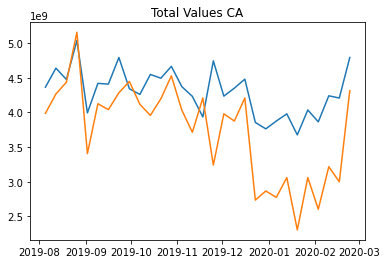

729677479.9927415


In [39]:
train,val,test = create_each_state("CA")
arima_model = arimamodel(train.total_value)
predictions = arima_model.predict(30)
plt.plot(pd.to_datetime(val.period_begin),predictions)
plt.plot(pd.to_datetime(val.period_begin),val.total_value)
plt.title("Total Values CA")

plt.show()
rms = np.sqrt(mean_squared_error(val.total_value,predictions))

print(rms)

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4721.687, Time=0.08 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4706.762, Time=1.13 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4703.786, Time=4.41 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4701.695, Time=0.45 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4702.753, Time=0.76 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4704.418, Time=4.72 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4702.376, Time=2.52 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4704.323, Time=6.28 sec
 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4706.303, Time=10.53 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4669.222, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4652.724, Time=0.79 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4649.616, Time=4.18 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4651.612, Time=0.55 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4652.871, Time=1.01 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4651.611, Time=5.5

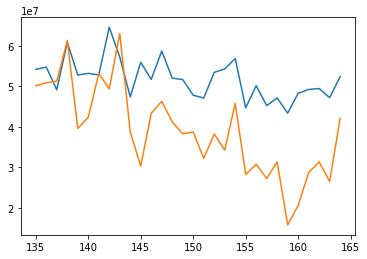

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3026.395, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3016.155, Time=1.81 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3018.156, Time=5.13 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3045.876, Time=1.01 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3018.140, Time=6.47 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3020.156, Time=5.96 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3018.136, Time=4.74 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3020.140, Time=7.00 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3022.156, Time=7.48 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=2989.896, Time=0.39 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=2991.736, Time=2.24 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=2993.085, Time=9.23 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=2991.728, Time=2.40 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,1,1)[52]             : AIC=2992.220, Time=17.25 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=2995.085, Time=11.85 sec
 ARIMA(0,1,1)(2,1,0)[52]             : AIC=2993.088, Time=8.71 sec
 ARIMA(0,1,1)(2,1,1)[52]             : AIC=2995.088, Time=9.48 sec
 ARIMA(0,1,1)(2,1,2)[52]             : AIC=2997.086, Time=12.18 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=2994.658, Time=0.64 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=2996.438, Time=3.46 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=2997.632, Time=11.69 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=2996.427, Time=3.24 sec
 ARIMA(0,1,2)(1,1,1)[52]             : AIC=2996.214, Time=17.02 sec
 ARIMA(0,1,2)(1,1,2)[52]             : AIC=2999.632, Time=14.83 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=2997.637, Time=12.17 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=2999.637, Time=15.50 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=2996.139, Time=0.60 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=2997.909, T

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,2)[52]             : AIC=2993.811, Time=63.51 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=2994.838, Time=17.64 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=2996.838, Time=20.85 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=2996.596, Time=3.18 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=2998.364, Time=10.83 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=2999.920, Time=15.18 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=2998.352, Time=13.00 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=2998.196, Time=17.78 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=2999.569, Time=43.24 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=2998.083, Time=2.24 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=2999.851, Time=12.02 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=2999.839, Time=14.60 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=2997.357, Time=1.93 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=2991.523, Time=0.40 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=2993.444, Time=2.28 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=2995.083, Time=11.21 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=2993.441, Time=3.07 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=2994.908, Time=22.34 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=2997.083, Time=14.18 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=2995.083, Time=11.83 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=2997.083, Time=14.79 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=2994.132, Time=1.25 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=2995.928, Time=6.51 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=2997.225, Time=17.69 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=2995.918, Time=4.54 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=2996.244, Time=19.32 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=2997.228, Time=19.10 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=2998.911, Time=2.12 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=3000.667, Time=10.25 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=3000.654, Time=10.83 sec
 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3003.434, Time=1.38 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=2993.029, Time=0.54 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=2994.736, Time=3.05 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=2995.752, Time=12.77 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=2994.718, Time=4.78 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=2994.759, Time=27.43 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=2995.762, Time=14.89 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=2994.594, Time=1.26 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=2996.295, Time=6.14 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=2996.276, Time=7.71 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,1,0)[52]             : AIC=2978.925, Time=5.15 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=2999.343, Time=1.02 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3000.981, Time=6.04 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3000.958, Time=5.71 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3002.073, Time=2.37 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=2996.098, Time=2.22 sec
Total fit time: 920.602 seconds


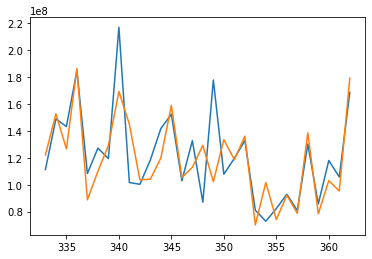

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4745.899, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4722.130, Time=1.16 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4718.601, Time=4.26 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4714.963, Time=0.50 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4716.829, Time=1.08 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4718.786, Time=4.74 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4716.774, Time=2.68 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4718.691, Time=8.60 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4720.632, Time=24.88 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4681.009, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4661.978, Time=0.76 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4659.437, Time=3.85 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4661.245, Time=0.62 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4661.864, Time=1.17 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4661.436, Time=5.68 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=4663.168, Time=3.50 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=4660.116, Time=17.60 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=4662.090, Time=21.56 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4673.828, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=4658.429, Time=0.88 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=4656.685, Time=3.89 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=4656.315, Time=0.81 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=4657.925, Time=0

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=4656.710, Time=22.21 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=4671.020, Time=0.05 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=4650.989, Time=0.98 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=4647.927, Time=4.28 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=4646.502, Time=0.81 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=4648.418, Time=1.24 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=4649.375, Time=5.77 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=4648.444, Time=4.19 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=4648.591, Time=13.27 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=4669.053, Time=0.06 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=4650.293, Time=1.28 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=4647.469, Time=6.73 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=4646.063, Time=1.11 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=4647.986, Time=1.73 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=4647.998, Time=6.

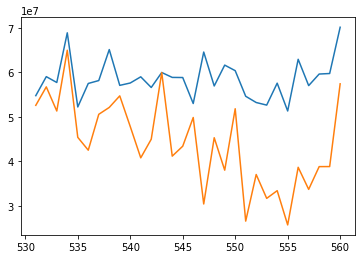

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3231.458, Time=0.25 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3218.713, Time=2.72 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3220.659, Time=8.03 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3356.960, Time=1.27 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3220.674, Time=3.27 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3222.659, Time=9.36 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3220.700, Time=4.78 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3222.674, Time=7.21 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3224.659, Time=18.29 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3198.555, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3195.445, Time=2.58 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3197.385, Time=8.67 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3195.396, Time=2.14 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3197.386, Time=5.17 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3199.386, Time=10.

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3190.863, Time=25.30 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3192.204, Time=11.89 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=3201.163, Time=0.94 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=3197.712, Time=6.36 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=3197.519, Time=9.33 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=3222.401, Time=1.74 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=3187.613, Time=0.76 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=3185.744, Time=3.04 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=3187.355, Time=10.34 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=3185.608, Time=2.51 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=3187.348, Time=10.24 sec
 ARIMA(1,1,0)(1,1,2)[52]             : AIC=3189.355, Time=14.75 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=3187.356, Time=10.29 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=3189.356, Time=14.00 sec
 ARIMA(1,1,0)(2,1,2)[52]             : AIC=3191.356, Ti

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=3195.492, Time=18.55 sec
 ARIMA(1,1,1)(1,1,2)[52]             : AIC=3201.104, Time=16.92 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=3199.107, Time=12.97 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=3201.106, Time=17.49 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=3196.895, Time=0.91 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3193.768, Time=7.67 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3195.270, Time=19.25 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3193.594, Time=8.15 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=3192.966, Time=18.87 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3195.273, Time=18.78 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3199.612, Time=2.32 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3194.858, Time=17.41 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3194.658, Time=15.37 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3214.638, Time=3.20 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=3194.248, Time=0.50 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=3191.108, Time=3.90 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=3192.689, Time=11.39 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=3190.947, Time=4.88 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=3192.678, Time=16.34 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=3194.691, Time=18.32 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=3192.692, Time=11.69 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=3194.692, Time=15.51 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=3204.203, 

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=3198.147, Time=24.59 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=3201.804, Time=18.23 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=3200.013, Time=1.81 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=3196.769, Time=10.24 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=3196.591, Time=9.08 sec
 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3201.683, Time=3.09 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3203.094, Time=0.69 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3199.218, Time=4.17 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3200.702, Time=25.86 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3199.030, Time=4.54 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3197.123, Time=21.40 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3200.707, Time=13.72 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3204.958, Time=3.12 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3201.121, Time=8.77 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3200.932, Time=8.90 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3184.010, Time=6.27 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3204.168, Time=1.12 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3200.570, Time=5.36 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3200.378, Time=9.72 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3206.222, Time=3.87 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3205.557, Time=1.99 sec
Total fit time: 842.094 seconds


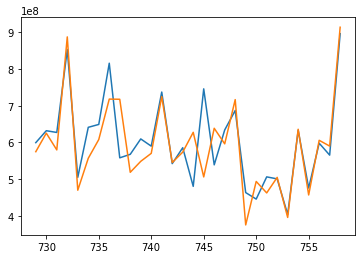

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5840.796, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5814.427, Time=0.79 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5809.623, Time=4.71 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5805.563, Time=0.72 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5807.148, Time=1.04 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5809.072, Time=7.55 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5807.038, Time=4.78 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5808.977, Time=4.88 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5810.902, Time=25.19 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5794.170, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5768.746, Time=0.84 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5764.006, Time=3.92 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5763.580, Time=0.64 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5765.315, Time=1.33 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5765.376, Time=7.39 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5765.510, Time=5.13 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5764.189, Time=12.05 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5766.073, Time=25.88 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5788.965, Time=0.05 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5765.661, Time=0.99 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5761.202, Time=5.53 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5759.121, Time=1.01 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5761.120, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=5764.720, Time=26.15 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5790.389, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5764.706, Time=1.33 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=5759.571, Time=5.34 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5756.930, Time=1.09 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=5758.908, Time=1.71 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=5759.989, Time=7.12 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=5758.548, Time=6.94 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=5759.317, Time=9.50 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=5791.949, Time=0.12 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=5767.034, Time=1.82 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=5762.114, Time=9.09 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=5758.974, Time=1.72 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=5760.868, Time=2.27 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=5760.527, Time=8.6

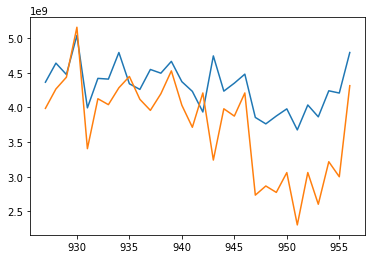

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3236.602, Time=0.31 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3225.870, Time=2.66 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3227.303, Time=6.64 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3246.819, Time=1.37 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3227.392, Time=8.39 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3229.303, Time=7.95 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3227.313, Time=5.12 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3229.302, Time=7.59 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3231.303, Time=7.92 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3199.227, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3199.799, Time=2.61 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3200.918, Time=8.39 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3199.721, Time=2.29 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3200.727, Time=13.48 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3202.918, Time=11.

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,1)[52]             : AIC=3196.236, Time=15.79 sec
 ARIMA(0,1,2)(1,1,2)[52]             : AIC=3198.381, Time=12.92 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=3196.382, Time=10.91 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=3198.382, Time=14.42 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3194.187, Time=0.71 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3194.504, Time=4.85 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3195.384, Time=16.06 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=3194.402, Time=4.18 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3195.391, Time=25.80 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3195.384, Time=12.95 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=3197.985, Time=1.24 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=3198.063, Time=7.54 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=3197.944, Time=8.24 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=3205.462, Time=1.80 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=3191.461, Time=0.60 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=3191.624, Time=3.03 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=3192.283, Time=12.34 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=3191.511, Time=3.07 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(1,1,1)[52]             : AIC=3191.685, Time=16.36 sec
 ARIMA(1,1,0)(1,1,2)[52]             : AIC=3194.284, Time=13.17 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=3192.285, Time=11.64 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=3194.285, Time=19.38 sec
 ARIMA(1,1,0)(2,1,2)[52]             : AIC=3196.285, Time=18.23 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=3193.842, Time=0.85 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=3194.118, Time=5.83 sec
 ARIMA(1,1,1)(0,1,2)[52]             : AIC=3194.486, Time=14.25 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=3194.004, Time=4.65 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=3193.774, Time=16.88 sec
 ARIMA(1,1,1)(1,1,2)[52]             : AIC=3196.487, Time=25.15 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=3194.489, Time=19.74 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=3196.489, Time=21.29 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=3197.878, Time=1.01 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3198.047, Time=7.26 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3198.227, Time=22.08 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3197.925, Time=5.81 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=3197.111, Time=22.84 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3198.231, Time=22.83 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3198.635, Time=1.59 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3198.868, Time=9.62 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3198.747, Time=8.34 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3204.083, Time=2.24 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=3193.363, Time=0.70 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=3193.651, Time=4.29 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=3194.102, Time=17.49 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=3193.539, Time=4.09 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=3193.485, Time=22.53 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=3196.102, Time=16.08 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=3194.104, Time=18.68 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=3196.104, Time=20.85 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=3196.830, Time=2.18 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=3197.058, Time=9.80 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=3197.328, Time=30.28 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=3196.940, Time=10.25 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=3196.470, Time=20.75 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=3197.332, Time=31.39 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=3198.872, Time=4.15 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=3198.536, Time=21.32 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=3198.355, Time=11.21 sec
 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3200.260, Time=3.67 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3196.817, Time=0.86 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3197.045, Time=4.80 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3197.271, Time=16.25 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3196.925, Time=4.57 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3196.342, Time=25.36 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3197.275, Time=22.30 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3198.328, Time=2.43 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3198.466, Time=19.64 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3198.339, Time=13.60 sec
 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3201.150, Time=6.17 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3198.833, Time=1.33 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3199.043, Time=6.83 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3198.921, Time=7.42 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3200.387, Time=3.64 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3201.059, Time=1.62 sec
Total fit time: 972.326 seconds


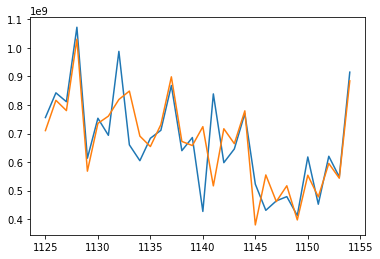

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5290.668, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5251.593, Time=0.75 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5244.258, Time=4.58 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5238.458, Time=0.60 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5240.457, Time=1.18 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5242.451, Time=6.77 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5240.458, Time=3.81 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5242.335, Time=22.38 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5244.335, Time=23.20 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5220.754, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5186.042, Time=0.74 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5179.328, Time=3.88 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5178.328, Time=0.75 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5179.344, Time=1.37 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5180.032, Time=5.79 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5180.190, Time=3.28 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5178.147, Time=32.53 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5180.064, Time=27.79 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5214.674, Time=0.05 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5185.292, Time=0.93 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5179.477, Time=4.78 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5178.743, Time=1.09 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5179.935, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=5184.393, Time=29.07 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5213.962, Time=0.05 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5179.473, Time=1.05 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=5172.323, Time=7.36 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5168.548, Time=1.45 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=5170.377, Time=2.20 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=5171.805, Time=11.33 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=5170.548, Time=5.20 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=5170.488, Time=18.07 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=5214.930, Time=0.08 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=5182.375, Time=1.36 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=5175.748, Time=8.12 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=5172.735, Time=1.42 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=5174.460, Time=2.00 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=5174.731, Time=8

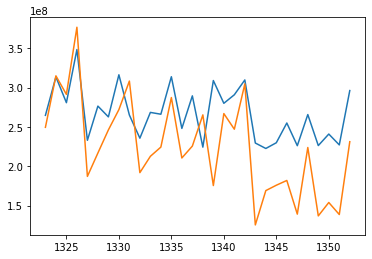

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5028.778, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4999.052, Time=1.71 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4995.016, Time=4.09 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4990.967, Time=0.54 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4992.931, Time=1.10 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4994.928, Time=6.71 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4992.924, Time=3.00 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4994.899, Time=4.43 sec
 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4996.895, Time=6.44 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4962.308, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4939.086, Time=0.86 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4936.176, Time=5.27 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4934.593, Time=0.68 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4936.305, Time=1.15 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4937.624, Time=6.24

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=4944.993, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=4955.641, Time=0.06 sec
 ARIMA(3,1,0)(0,0,1)[52] intercept   : AIC=4930.636, Time=1.26 sec
 ARIMA(3,1,0)(0,0,2)[52] intercept   : AIC=4927.450, Time=8.24 sec
 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=4923.930, Time=1.56 sec
 ARIMA(3,1,0)(1,0,1)[52] intercept   : AIC=4925.909, Time=2.12 sec
 ARIMA(3,1,0)(2,0,0)[52] intercept   : AIC=4925.887, Time=6.27 sec
 ARIMA(3,1,1)(0,0,0)[52] intercept   : AIC=4956.298, Time=0.08 sec
 ARIMA(3,1,1)(0,0,1)[52] intercept   : AIC=4930.822, Time=1.77 sec
 ARIMA(3,1,1)(1,0,0)[52] intercept   : AIC=4924.419, Time=3.21 sec
 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=4958.300, Time=0.25 sec
 ARIMA(4,1,0)(0,0,0)[52] intercept   : AIC=4956.257, Time=0.13 sec
 ARIMA(4,1,0)(0,0,1)[52] intercept   : AIC=4930.397, Time=1.44 sec
 ARIMA(4,1,0)(1,0,0)[52] intercept   : AIC=4923.200, Time=2.24 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,1,1)(0,0,0)[52] intercept   : AIC=4951.201, Time=0.78 sec
 ARIMA(5,1,0)(0,0,0)[52] intercept   : AIC=4958.211, Time=0.09 sec
Total fit time: 374.467 seconds


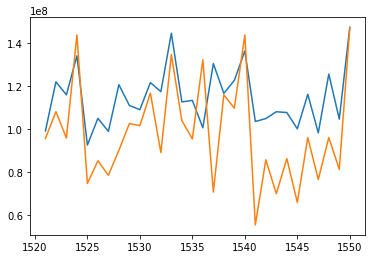

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5019.968, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4985.171, Time=1.15 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4978.742, Time=6.55 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4973.192, Time=0.51 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4975.165, Time=0.94 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4977.161, Time=5.80 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4975.157, Time=4.62 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4977.121, Time=3.95 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4979.095, Time=26.80 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4931.548, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4903.091, Time=0.70 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4898.253, Time=6.59 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4899.181, Time=0.84 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4899.817, Time=1.56 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4899.945, Time=9.08 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=4900.991, Time=12.18 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=4898.112, Time=26.34 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=4899.933, Time=30.37 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4921.330, Time=0.05 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=4902.237, Time=0.91 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=4899.765, Time=4.85 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=4899.942, Time=1.05 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=4901.069, Time=

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=4909.476, Time=25.38 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=4919.619, Time=0.05 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=4891.805, Time=1.00 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=4886.810, Time=6.16 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=4884.802, Time=0.98 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=4886.407, Time=1.51 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=4887.599, Time=7.78 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=4886.779, Time=20.59 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=4886.226, Time=19.73 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=4920.377, Time=0.11 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=4894.196, Time=1.67 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=4889.746, Time=12.11 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=4889.342, Time=2.31 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=4890.505, Time=2.14 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=4896.546, Time=

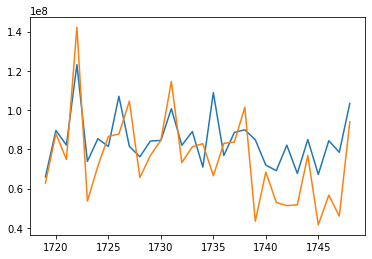

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5793.740, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5758.205, Time=0.70 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5751.634, Time=4.13 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5746.030, Time=0.51 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5748.010, Time=0.81 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5750.004, Time=4.93 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5748.000, Time=2.28 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5749.944, Time=3.80 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5751.909, Time=21.28 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5721.827, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5690.567, Time=0.61 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5685.020, Time=4.39 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5684.964, Time=0.96 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5685.928, Time=1.62 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5686.304, Time=6.44 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5686.860, Time=3.99 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5684.433, Time=19.81 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5686.378, Time=19.97 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5720.664, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5696.935, Time=0.94 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5693.178, Time=4.90 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5693.083, Time=1.14 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5694.268, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=5704.690, Time=26.75 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5719.091, Time=0.05 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5689.535, Time=0.96 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=5684.330, Time=5.93 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5682.409, Time=1.07 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=5684.030, Time=1.85 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=5685.107, Time=7.63 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=5684.399, Time=4.22 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=5683.649, Time=17.74 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=5718.492, Time=0.09 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=5691.019, Time=1.86 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=5686.402, Time=13.46 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=5684.297, Time=1.56 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=5685.986, Time=3.02 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=5686.289, Time=8

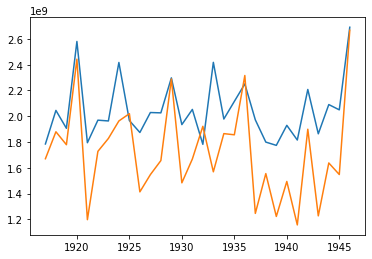

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5543.122, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5504.168, Time=0.73 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5496.874, Time=5.62 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5490.913, Time=1.11 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5492.908, Time=1.54 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5494.905, Time=6.19 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5492.904, Time=3.51 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5494.859, Time=6.64 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5496.833, Time=31.22 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5466.108, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5431.603, Time=1.31 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5425.409, Time=4.59 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5425.595, Time=0.94 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5426.314, Time=1.15 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5426.605, Time=7.32 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5427.418, Time=4.11 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5424.564, Time=19.83 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5426.445, Time=36.79 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5460.134, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5435.625, Time=1.20 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5431.822, Time=5.43 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5431.279, Time=0.92 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5432.571, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=5437.820, Time=25.99 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5459.126, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5425.909, Time=0.92 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=5419.941, Time=5.84 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5417.377, Time=0.92 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=5419.023, Time=1.61 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=5420.243, Time=7.55 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=5419.364, Time=5.24 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=5418.761, Time=21.88 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=5458.302, Time=0.08 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=5427.948, Time=1.62 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=5422.720, Time=9.21 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=5420.384, Time=1.59 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=5422.039, Time=2.04 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=5422.369, Time=9.

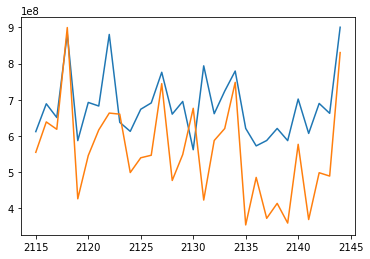

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5078.020, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5070.696, Time=0.99 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5071.047, Time=4.26 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5069.438, Time=0.39 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5070.970, Time=0.97 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5072.782, Time=7.17 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5070.768, Time=2.63 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5072.758, Time=3.21 sec
 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5074.758, Time=5.61 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5008.904, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5002.182, Time=0.81 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5003.251, Time=4.91 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5003.360, Time=0.59 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5004.181, Time=1.27 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5004.675, Time=5.79

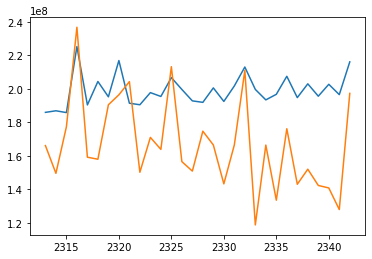

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4767.221, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4743.837, Time=1.32 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4740.427, Time=4.47 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4736.871, Time=0.63 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4738.575, Time=0.92 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4740.483, Time=3.93 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4738.457, Time=2.42 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4740.371, Time=5.88 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4742.291, Time=20.48 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4719.935, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4698.170, Time=0.71 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4694.457, Time=4.21 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4693.855, Time=0.48 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4695.591, Time=1.15 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4695.943, Time=4.79 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=4695.809, Time=3.07 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=4694.786, Time=13.74 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=4696.696, Time=27.36 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4719.761, Time=0.08 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=4699.124, Time=1.19 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=4695.593, Time=4.29 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=4695.486, Time=0.78 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=4697.116, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=4699.080, Time=26.71 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=4718.898, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=4696.928, Time=0.96 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=4692.905, Time=5.53 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=4690.792, Time=1.35 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=4692.791, Time=1.59 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=4693.819, Time=6.41 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=4692.562, Time=4.47 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=4693.049, Time=12.37 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=4719.084, Time=0.07 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=4697.218, Time=1.40 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=4693.135, Time=7.99 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=4690.619, Time=1.47 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=4692.617, Time=2.71 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=4692.377, Time=7.

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=4717.891, Time=0.46 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=4713.662, Time=0.05 sec
 ARIMA(3,1,0)(0,0,1)[52] intercept   : AIC=4689.972, Time=0.89 sec
 ARIMA(3,1,0)(0,0,2)[52] intercept   : AIC=4684.696, Time=5.23 sec
 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=4681.000, Time=1.04 sec
 ARIMA(3,1,0)(1,0,1)[52] intercept   : AIC=4682.721, Time=1.72 sec
 ARIMA(3,1,0)(2,0,0)[52] intercept   : AIC=4682.354, Time=5.43 sec
 ARIMA(3,1,1)(0,0,0)[52] intercept   : AIC=4714.438, Time=0.10 sec
 ARIMA(3,1,1)(0,0,1)[52] intercept   : AIC=4690.813, Time=1.88 sec
 ARIMA(3,1,1)(1,0,0)[52] intercept   : AIC=4682.350, Time=1.56 sec
 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=4711.723, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[52] intercept   : AIC=4712.937, Time=0.08 sec
 ARIMA(4,1,0)(0,0,1)[52] intercept   : AIC=4688.579, Time=1.42 sec
 ARIMA(4,1,0)(1,0,0)[52] intercept   : AIC=4679.465, Time=1.34 sec
 ARIMA(4,1,1)(0,0,0)[52] intercept   : AIC=4708.940, Time=0.26

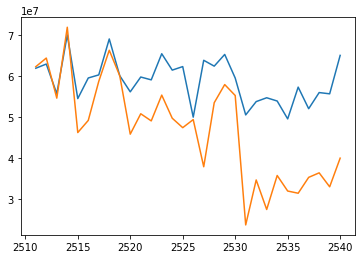

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4994.920, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4961.738, Time=0.67 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4955.672, Time=6.38 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4950.431, Time=0.57 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4952.401, Time=0.95 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4954.356, Time=5.46 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4952.361, Time=3.49 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4954.151, Time=8.29 sec
 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4956.094, Time=12.96 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4930.577, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4898.766, Time=0.65 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4893.513, Time=3.62 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4900.350, Time=0.75 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4897.846, Time=1.53 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4895.512, Time=5.3

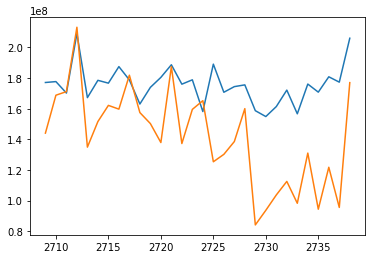

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5502.265, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5462.310, Time=0.77 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5455.067, Time=4.03 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5449.521, Time=0.38 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5451.485, Time=0.81 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5453.478, Time=4.87 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5451.496, Time=2.68 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5453.380, Time=20.68 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5455.361, Time=23.31 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5439.409, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5404.835, Time=0.70 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5398.737, Time=3.66 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5397.816, Time=0.75 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5398.624, Time=1.03 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5399.527, Time=5.50 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5399.521, Time=3.59 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5397.950, Time=21.39 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5399.805, Time=22.71 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5429.977, Time=0.06 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5400.485, Time=1.03 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5395.445, Time=4.35 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5393.686, Time=0.93 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5395.049, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=5387.013, Time=20.09 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=5389.013, Time=23.31 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5429.782, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5392.300, Time=0.88 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=5385.314, Time=4.74 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5381.149, Time=0.92 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=5382.901, Time=1.25 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=5384.577, Time=5.96 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=5383.106, Time=4.94 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=5383.606, Time=28.36 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=5428.359, Time=0.10 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=5392.909, Time=1.26 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=5386.389, Time=6.54 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=5382.527, Time=1.23 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=5384.257, Time=1.62 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=5384.478, Time=6.

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(2,0,1)[52] intercept   : AIC=5387.235, Time=29.72 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=5433.086, Time=0.08 sec
 ARIMA(2,1,1)(0,0,1)[52] intercept   : AIC=5384.923, Time=1.48 sec
 ARIMA(2,1,1)(0,0,2)[52] intercept   : AIC=5375.619, Time=8.47 sec
 ARIMA(2,1,1)(1,0,0)[52] intercept   : AIC=5371.775, Time=1.62 sec
 ARIMA(2,1,1)(1,0,1)[52] intercept   : AIC=5373.116, Time=1.62 sec
 ARIMA(2,1,1)(2,0,0)[52] intercept   : AIC=5373.607, Time=7.18 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=5430.362, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=5394.909, Time=1.77 sec
 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=5384.218, Time=2.03 sec
 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=5424.568, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=5414.692, Time=0.06 sec
 ARIMA(3,1,0)(0,0,1)[52] intercept   : AIC=5376.144, Time=0.91 sec
 ARIMA(3,1,0)(0,0,2)[52] intercept   : AIC=5368.824, Time=6.52 sec
 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=5363.751, Time=1.4

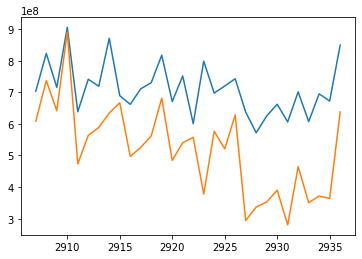

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3010.481, Time=0.18 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=2988.653, Time=2.38 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=2987.142, Time=5.90 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=2995.307, Time=1.26 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=2987.405, Time=3.76 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=2989.097, Time=21.94 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=2987.455, Time=5.07 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=2989.270, Time=6.85 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=2991.094, Time=15.27 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=2974.804, Time=0.47 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=2964.500, Time=4.20 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=2963.009, Time=28.63 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=2963.216, Time=3.21 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=2971.375, Time=10.10 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=2964.760, Time=

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(2,1,2)[52]             : AIC=2966.760, Time=85.34 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=2981.654, Time=0.47 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=2969.725, Time=3.37 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=2967.440, Time=10.93 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=2968.322, Time=2.29 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,1)[52]             : AIC=2964.870, Time=14.65 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,2)[52]             : AIC=2965.817, Time=50.35 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=2967.524, Time=10.66 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(2,1,1)[52]             : AIC=2966.852, Time=68.31 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3344.204, Time=1.06 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3188.524, Time=23.56 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3188.693, Time=55.37 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=3289.498, Time=5.32 sec
 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3190.243, Time=25.43 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3227.414, Time=20.32 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=2987.017, Time=1.17 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=2976.994, Time=5.52 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=2975.679, Time=5.78 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=2999.164, Time=1.28 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=2971.010, Time=0.45 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=2963.971, Time=4.33 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=2962.863, Time=9.72 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=2963.032, Time=2.53 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=2962.743, Time=9.58 sec
 ARIMA(1,1,0)(1,1,2)[52]             : AIC=2964.867, Time=

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=2963.775, Time=19.87 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,2)[52]             : AIC=2965.531, Time=61.93 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=2965.295, Time=10.40 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(2,1,1)[52]             : AIC=2965.802, Time=58.65 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=2983.701, Time=1.17 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=2972.911, Time=7.00 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=2970.459, Time=32.91 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=2971.578, Time=8.72 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=2967.236, Time=20.42 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=2970.560, Time=27.43 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=2984.001, Time=1.97 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=2974.166, Time=11.59 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=2972.894, Time=11.08 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=2990.742, Time=1.44 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=2974.948, Time=0.60 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=2966.263, Time=5.70 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=2964.791, Time=10.63 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=2965.141, Time=2.69 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=2963.962, Time=15.98 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=2965.925, Time=42.94 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=2964.821, Time=12.04 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=2966.820, Time=16.72 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=2978.330, Time=1.68 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=2968.934, Time=8.32 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=2967.167, Time=32.04 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=2967.751, Time=10.84 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=2965.625, Time=18.18 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=2967.218, Time=35.76 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=2986.247, Time=2.43 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,2)(0,1,1)[52]             : AIC=2974.875, Time=19.70 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,2)(1,1,0)[52]             : AIC=2973.535, Time=20.23 sec
 ARIMA(2,1,3)(0,1,0)[52]             : AIC=2979.945, Time=5.50 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=2978.183, Time=0.68 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=2969.160, Time=3.71 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=2967.336, Time=13.30 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=2967.990, Time=3.64 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=2965.637, Time=18.21 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=2967.394, Time=16.75 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=2979.416, Time=1.53 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=2970.634, Time=8.03 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=2969.486, Time=7.53 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,1,0)[52]             : AIC=2976.260, Time=5.25 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=2983.227, Time=0.92 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=2973.288, Time=3.72 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=2972.001, Time=4.68 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=2984.079, Time=2.91 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=2985.173, Time=1.23 sec
Total fit time: 1317.078 seconds


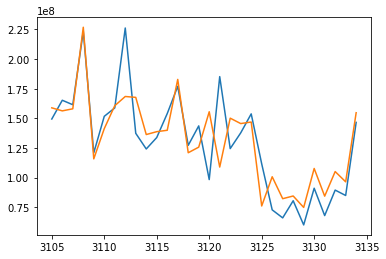

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4907.101, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4875.767, Time=0.74 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4870.513, Time=4.11 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4865.677, Time=0.72 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4867.551, Time=1.19 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4869.532, Time=5.99 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4867.517, Time=2.97 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4869.461, Time=4.40 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4871.404, Time=21.18 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4852.129, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4822.575, Time=0.74 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4817.776, Time=3.97 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4817.440, Time=0.61 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4818.559, Time=1.09 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4819.074, Time=4.23 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=4819.377, Time=3.11 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=4817.401, Time=15.83 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=4819.389, Time=21.30 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4847.275, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=4820.724, Time=0.72 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=4816.819, Time=5.40 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=4815.398, Time=0.81 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=4816.924, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=4815.874, Time=23.58 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=4846.936, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=4815.679, Time=0.98 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=4810.727, Time=4.72 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=4807.748, Time=0.85 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=4809.594, Time=1.50 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=4811.095, Time=6.68 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=4809.747, Time=3.93 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=4810.094, Time=16.64 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=4846.160, Time=0.06 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=4816.303, Time=1.17 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=4811.655, Time=6.24 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=4808.328, Time=1.22 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=4810.265, Time=1.95 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=4810.325, Time=6.

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=4844.833, Time=0.47 sec
 ARIMA(4,1,0)(0,0,0)[52] intercept   : AIC=4837.030, Time=0.08 sec
 ARIMA(4,1,0)(0,0,1)[52] intercept   : AIC=4805.560, Time=1.26 sec
 ARIMA(4,1,0)(1,0,0)[52] intercept   : AIC=4795.962, Time=1.47 sec
 ARIMA(4,1,1)(0,0,0)[52] intercept   : AIC=4838.908, Time=0.13 sec
 ARIMA(5,1,0)(0,0,0)[52] intercept   : AIC=4826.914, Time=0.10 sec
Total fit time: 342.534 seconds


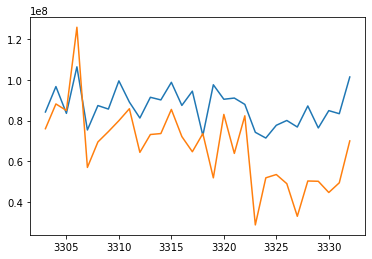

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5027.864, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4990.512, Time=0.76 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4984.020, Time=3.65 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4978.631, Time=0.47 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4980.628, Time=0.80 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4982.616, Time=4.37 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4980.631, Time=2.66 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4982.451, Time=19.59 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4984.451, Time=21.05 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4963.514, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4931.130, Time=0.68 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4925.622, Time=3.72 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4927.282, Time=0.70 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4927.253, Time=1.08 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4927.149, Time=4.00 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=4928.861, Time=3.11 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=4925.176, Time=17.17 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=4926.976, Time=24.11 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4956.984, Time=0.05 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=4930.610, Time=0.84 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=4926.344, Time=4.62 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=4927.437, Time=1.12 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=4927.912, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=4925.466, Time=20.27 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=4927.463, Time=22.22 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=4956.170, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=4923.806, Time=0.86 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=4918.157, Time=4.88 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=4916.358, Time=1.06 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=4917.752, Time=1.32 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=4918.754, Time=6.43 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=4918.295, Time=4.94 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=4917.186, Time=20.56 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=4955.554, Time=0.07 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=4924.946, Time=1.42 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=4919.815, Time=6.50 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=4917.943, Time=1.31 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=4919.359, Time=1.69 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=4919.868, Time=6.

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(2,0,1)[52] intercept   : AIC=4924.330, Time=26.77 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=4960.398, Time=0.06 sec
 ARIMA(2,1,1)(0,0,1)[52] intercept   : AIC=4917.635, Time=1.28 sec
 ARIMA(2,1,1)(0,0,2)[52] intercept   : AIC=4909.880, Time=7.75 sec
 ARIMA(2,1,1)(1,0,0)[52] intercept   : AIC=4908.779, Time=2.09 sec
 ARIMA(2,1,1)(1,0,1)[52] intercept   : AIC=4909.695, Time=1.45 sec
 ARIMA(2,1,1)(2,0,0)[52] intercept   : AIC=4910.620, Time=6.85 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=4957.547, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=4926.934, Time=1.62 sec
 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=4919.312, Time=2.16 sec
 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=4954.065, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=4941.174, Time=0.06 sec
 ARIMA(3,1,0)(0,0,1)[52] intercept   : AIC=4907.430, Time=1.04 sec
 ARIMA(3,1,0)(0,0,2)[52] intercept   : AIC=4901.258, Time=6.90 sec
 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=4896.949, Time=1.2

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=4940.468, Time=0.43 sec
 ARIMA(4,1,0)(0,0,0)[52] intercept   : AIC=4939.513, Time=0.06 sec
 ARIMA(4,1,0)(0,0,1)[52] intercept   : AIC=4905.716, Time=1.34 sec
 ARIMA(4,1,0)(1,0,0)[52] intercept   : AIC=4894.860, Time=1.47 sec
 ARIMA(4,1,1)(0,0,0)[52] intercept   : AIC=4929.438, Time=0.25 sec
 ARIMA(5,1,0)(0,0,0)[52] intercept   : AIC=4932.136, Time=0.11 sec
Total fit time: 375.216 seconds


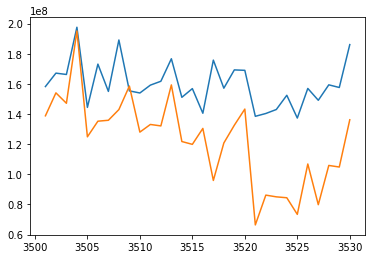

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3039.872, Time=0.27 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3027.193, Time=3.34 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3028.529, Time=5.35 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3048.147, Time=1.02 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3028.634, Time=4.82 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3030.527, Time=8.94 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3028.597, Time=5.48 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3030.556, Time=7.29 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3032.526, Time=9.80 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=2994.197, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=2992.642, Time=2.48 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=2994.374, Time=12.34 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=2992.809, Time=2.28 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=2994.222, Time=9.62 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=2996.133, Time=47.

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,2)[52]             : AIC=2996.681, Time=53.95 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=2996.212, Time=11.01 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=2998.210, Time=14.30 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=2995.540, Time=0.78 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=2994.568, Time=4.27 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=2996.307, Time=15.56 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=2994.707, Time=3.85 sec
 ARIMA(0,1,3)(1,1,1)[52]             : AIC=2996.022, Time=15.08 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=2996.311, Time=15.09 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=2995.142, Time=1.15 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=2994.422, Time=10.78 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=2994.548, Time=5.04 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=2995.754, Time=1.50 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=2993.350, Time=0.40 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=2993.768, Ti

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3000.762, Time=53.22 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3001.396, Time=6.09 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=2998.477, Time=19.09 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3002.680, Time=24.37 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3004.458, Time=2.08 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3002.264, Time=9.05 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3002.470, Time=9.86 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3000.467, Time=1.80 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=2994.442, Time=0.50 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=2994.376, Time=2.81 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=2996.039, Time=10.72 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=2994.484, Time=2.80 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=2995.818, Time=12.22 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=2998.040, Time=13.68 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=2996.041, Time=13.58 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=2998.041, Time=13.05 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=2996.930, Ti

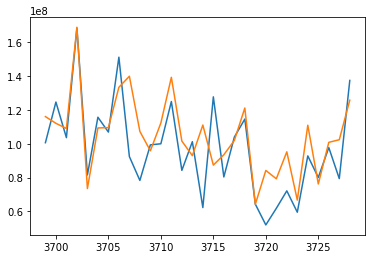

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3288.623, Time=0.23 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3278.098, Time=3.06 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3273.979, Time=7.42 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3278.885, Time=1.25 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3277.088, Time=6.84 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3275.978, Time=9.64 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3274.138, Time=4.83 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3276.049, Time=6.96 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3277.974, Time=8.98 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3241.892, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3312.400, Time=6.43 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3242.756, Time=33.08 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3243.570, Time=3.47 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3243.961, Time=5.58 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3244.755, Time=55.54 sec
 ARIMA(0,1,1)(2,1,0)[52]             : AIC=3242.754, Time=13.77 sec
 ARIMA(0,1,1)(2,1,1)[52]             : AIC=inf, Time=nan sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(2,1,2)[52]             : AIC=3246.762, Time=78.28 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=3237.033, Time=0.43 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=3238.817, Time=2.28 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=3239.272, Time=9.49 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=3238.836, Time=2.26 sec
 ARIMA(0,1,2)(1,1,1)[52]             : AIC=3239.912, Time=8.23 sec
 ARIMA(0,1,2)(1,1,2)[52]             : AIC=3241.272, Time=10.43 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=3239.272, Time=10.60 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=3241.272, Time=12.26 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3234.444, Time=0.81 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3236.383, Time=3.98 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3236.989, Time=14.47 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=3236.388, Time=5.77 sec
 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3237.678, Time=13.30 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3236.989, Tim

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=3234.064, Time=19.09 sec
 ARIMA(1,1,1)(1,1,2)[52]             : AIC=3236.019, Time=15.83 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=3234.019, Time=11.90 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=3236.019, Time=13.79 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=3234.996, Time=0.92 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3236.908, Time=7.58 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3237.338, Time=19.05 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3236.914, Time=4.98 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=3237.015, Time=19.97 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3237.339, Time=19.16 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3233.818, Time=1.32 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3235.754, Time=6.34 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3235.759, Time=6.66 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3236.570, Time=1.54 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=3231.323, Time=0.65 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=3233.276, Time=3.73 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=3234.001, Time=15.04 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=3233.279, Time=4.29 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=3234.021, Time=16.58 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=3236.001, Time=13.73 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=3234.001, Time=15.48 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=3236.001, Time=25.09 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=3234.577, Time=2.92 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=3236.529, Time=11.76 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=3237.066, Time=37.33 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=3236.533, Time=10.23 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=3236.940, Time=21.37 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=3238.001, Time=14.46 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=3236.334, Time=1.77 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=3238.253, Time=12.85 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=3238.259, Time=10.17 sec
 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3224.667, Time=2.14 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3233.108, Time=0.74 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3235.007, Time=4.32 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3235.320, Time=16.08 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3235.015, Time=5.79 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3235.171, Time=20.26 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3235.321, Time=18.79 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3234.913, Time=3.34 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3236.819, Time=9.44 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3236.826, Time=8.88 sec
 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3238.806, Time=5.40 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3235.468, Time=1.25 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3237.377, Time=5.45 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3237.384, Time=5.81 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3232.256, Time=7.36 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3237.415, Time=1.64 sec
Total fit time: 953.728 seconds


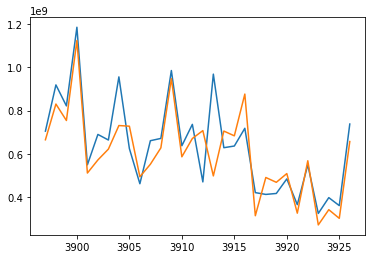

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5527.624, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5491.951, Time=0.78 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5484.725, Time=6.45 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5478.655, Time=0.98 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5480.641, Time=1.24 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5482.637, Time=5.47 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5480.635, Time=2.36 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5482.580, Time=12.03 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5484.561, Time=21.81 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5446.521, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5414.074, Time=0.57 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5407.910, Time=3.93 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5408.099, Time=0.95 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5408.804, Time=1.23 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5409.095, Time=4.88 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5409.910, Time=3.20 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5407.093, Time=16.57 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5408.957, Time=14.96 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5435.348, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5413.863, Time=0.83 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5410.521, Time=4.17 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5409.805, Time=1.01 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5411.179, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=5421.378, Time=21.79 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5437.668, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5406.230, Time=0.79 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=5400.235, Time=4.31 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5397.632, Time=0.96 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=5399.228, Time=1.24 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=5400.494, Time=6.21 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=5399.599, Time=3.71 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=5399.083, Time=19.30 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=5438.678, Time=0.08 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=5411.125, Time=1.33 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=5406.230, Time=6.94 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=5404.400, Time=1.41 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=5405.924, Time=2.07 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=5406.356, Time=7.

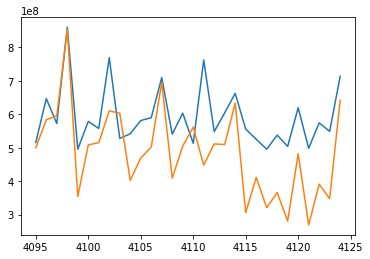

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=2941.075, Time=0.25 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=2927.793, Time=2.65 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=2929.738, Time=7.36 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=2928.458, Time=1.38 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=2929.759, Time=5.08 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=2931.738, Time=6.21 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=2929.792, Time=4.40 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=2931.759, Time=6.14 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=2933.738, Time=8.91 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=2898.177, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=2896.935, Time=1.81 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=2898.882, Time=6.72 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=2897.000, Time=1.96 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=2898.882, Time=4.14 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=2900.882, Time=9.37

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(1,1,1)[52]             : AIC=2895.768, Time=24.85 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=2896.086, Time=12.52 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=2897.183, Time=0.82 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=2896.255, Time=4.62 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=2896.396, Time=4.44 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=2898.698, Time=1.47 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=2892.130, Time=0.85 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=2891.678, Time=2.92 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=2893.457, Time=12.00 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=2891.779, Time=2.34 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=2893.458, Time=6.51 sec
 ARIMA(1,1,0)(1,1,2)[52]             : AIC=2895.457, Time=11.21 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=2893.457, Time=6.97 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=2895.457, Time=10.08 sec
 ARIMA(1,1,0)(2,1,2)[52]             : AIC=2897.457, Time

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=2895.939, Time=19.70 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=2896.213, Time=18.76 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=2897.874, Time=2.55 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=2896.727, Time=11.13 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=2896.876, Time=12.11 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=2899.595, Time=0.95 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=2893.381, Time=0.49 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=2892.420, Time=2.74 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=2894.137, Time=9.70 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=2892.545, Time=3.63 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=2894.126, Time=8.33 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=2896.137, Time=13.80 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=2894.138, Time=16.85 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=2896.138, Time=18.91 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=2894.913, Ti

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=2895.322, Time=19.37 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=2895.503, Time=25.63 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=2896.940, Time=1.30 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=2895.711, Time=8.34 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=2895.855, Time=9.24 sec
 ARIMA(2,1,3)(0,1,0)[52]             : AIC=2900.513, Time=1.58 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=2895.461, Time=0.61 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=2894.438, Time=3.07 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=2896.037, Time=9.98 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=2894.581, Time=8.34 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=2895.719, Time=23.84 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=2896.039, Time=9.65 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=2896.765, Time=1.97 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=2895.592, Time=11.63 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=2895.736, Time=11.48 sec
 ARIMA(3,1,2)(0,1,0)[52]             : AIC=2898.897, Time=3.66 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=2897.638, Time=0.98 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=2896.568, Time=4.01 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=2896.714, Time=7.15 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=2899.371, Time=2.41 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=2899.503, Time=1.29 sec
Total fit time: 740.535 seconds


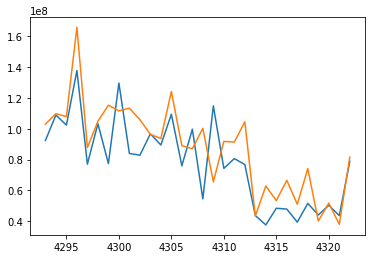

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3179.768, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3167.402, Time=1.91 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3162.058, Time=13.12 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3172.485, Time=1.47 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3166.129, Time=4.78 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3164.038, Time=12.12 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3162.224, Time=4.60 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3164.058, Time=10.19 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3165.903, Time=19.83 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3142.126, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3142.587, Time=1.87 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3139.015, Time=7.80 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3142.911, Time=1.66 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3142.105, Time=6.27 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3141.011, Time=

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3126.834, Time=5.08 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3138.628, Time=1.07 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3139.191, Time=4.82 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3139.416, Time=4.62 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3139.198, Time=1.50 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3137.751, Time=1.04 sec
Total fit time: 714.914 seconds


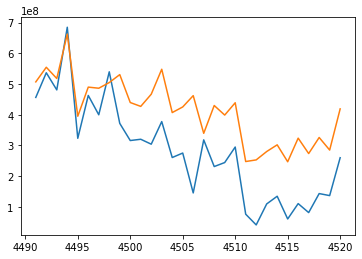

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3164.739, Time=0.28 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3154.218, Time=1.92 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3154.125, Time=9.59 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3162.299, Time=1.39 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3154.935, Time=6.82 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3156.125, Time=7.12 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3154.169, Time=4.09 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3156.141, Time=6.05 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3158.125, Time=7.02 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3119.859, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3121.827, Time=3.80 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3122.883, Time=29.29 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3121.829, Time=2.90 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3123.576, Time=10.04 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3124.692, Time=46.92 sec
 ARIMA(0,1,1)(2,1,0)[52]             : AIC=3122.883, Time=12.13 sec
 ARIMA(0,1,1)(2,1,1)[52]             : AIC=3124.688, Time=40.53 sec
 ARIMA(0,1,1)(2,1,2)[52]             : AIC=3126.688, Time=46.51 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=3115.914, Time=0.39 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=3117.912, Time=2.28 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=3119.171, Time=8.91 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=3117.912, Time=3.24 sec
 ARIMA(0,1,2)(1,1,1)[52]             : AIC=3119.912, Time=3.21 sec
 ARIMA(0,1,2)(1,1,2)[52]             : AIC=3121.171, Time=10.18 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=3119.171, Time=13.94 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=3121.171, Time=11.08 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3117.052, Time=2.52 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3119.037, Time=15.63 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3165.438, T

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=3118.405, Time=17.57 sec
 ARIMA(1,1,1)(1,1,2)[52]             : AIC=3120.711, Time=14.04 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=3118.711, Time=11.00 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=3120.711, Time=12.38 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=3117.692, Time=0.87 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3119.643, Time=3.92 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3121.144, Time=16.13 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3119.645, Time=6.24 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=3120.664, Time=19.01 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3121.144, Time=14.91 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3116.799, Time=1.07 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3118.770, Time=5.48 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3118.771, Time=7.18 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3115.550, Time=1.23 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=3114.496, Time=0.66 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=3116.443, Time=4.19 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=3117.871, Time=13.19 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=3116.446, Time=4.81 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=3117.680, Time=15.50 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=3119.871, Time=12.98 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=3117.871, Time=14.17 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=3119.871, Time=16.94 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=3119.981, Time=1.40 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=3121.913, Time=7.03 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=3123.272, Time=22.98 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=3121.916, Time=8.24 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=3122.622, Time=20.96 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=3123.272, Time=43.03 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=3119.445, Time=1.65 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=3121.397, Time=10.74 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=3121.399, Time=10.13 sec
 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3120.304, Time=1.84 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3117.838, Time=0.86 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3119.810, Time=4.20 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3121.503, Time=16.93 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3119.811, Time=4.67 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3120.915, Time=19.76 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3121.503, Time=23.54 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3119.532, Time=1.96 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3121.504, Time=7.67 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3121.504, Time=8.91 sec
 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3107.506, Time=4.32 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3121.748, Time=1.19 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3123.714, Time=4.70 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3123.715, Time=6.92 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3122.759, Time=2.13 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3116.342, Time=1.32 sec
Total fit time: 992.207 seconds


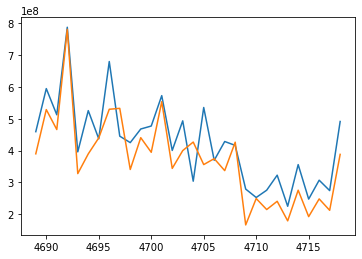

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5185.372, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5148.502, Time=0.72 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5142.302, Time=4.88 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5137.219, Time=0.85 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5139.215, Time=1.05 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5141.205, Time=5.14 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5139.219, Time=3.12 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5141.068, Time=17.91 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5143.068, Time=20.09 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5120.510, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5089.041, Time=0.62 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5084.056, Time=3.50 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5085.009, Time=0.97 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5085.302, Time=1.28 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5085.589, Time=5.70 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5086.641, Time=4.41 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5083.891, Time=19.64 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5085.712, Time=19.89 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5109.492, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5083.857, Time=0.83 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5079.935, Time=4.15 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5079.231, Time=0.95 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5080.471, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=5073.932, Time=19.73 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=5075.932, Time=22.26 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5109.716, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5075.886, Time=0.86 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=5070.270, Time=5.41 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5067.459, Time=1.44 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=5069.101, Time=1.73 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=5070.543, Time=9.22 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=5069.414, Time=4.19 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=5069.405, Time=18.60 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=5108.827, Time=0.07 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=5077.494, Time=1.23 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=5072.504, Time=6.61 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=5069.992, Time=1.27 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=5071.598, Time=1.92 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=5071.933, Time=6.

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(2,0,1)[52] intercept   : AIC=5073.576, Time=21.39 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=5113.027, Time=0.07 sec
 ARIMA(2,1,1)(0,0,1)[52] intercept   : AIC=5070.087, Time=2.18 sec
 ARIMA(2,1,1)(0,0,2)[52] intercept   : AIC=5062.735, Time=7.61 sec
 ARIMA(2,1,1)(1,0,0)[52] intercept   : AIC=5060.685, Time=1.59 sec
 ARIMA(2,1,1)(1,0,1)[52] intercept   : AIC=5061.921, Time=2.06 sec
 ARIMA(2,1,1)(2,0,0)[52] intercept   : AIC=5062.543, Time=6.19 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=5110.827, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=5079.494, Time=1.54 sec
 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=5071.470, Time=2.43 sec
 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=5105.643, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=5095.920, Time=0.06 sec
 ARIMA(3,1,0)(0,0,1)[52] intercept   : AIC=5062.079, Time=0.84 sec
 ARIMA(3,1,0)(0,0,2)[52] intercept   : AIC=5056.404, Time=6.14 sec
 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=5052.426, Time=1.2

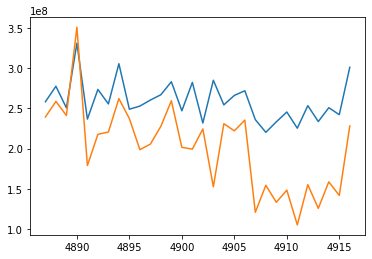

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3950.365, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=3952.210, Time=0.51 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=3952.453, Time=3.00 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=3952.181, Time=0.31 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=3953.382, Time=1.55 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=3954.452, Time=2.88 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=3952.436, Time=1.81 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=3954.436, Time=2.95 sec
 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=3956.436, Time=5.92 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=3884.223, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=3885.487, Time=0.63 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=3886.392, Time=3.59 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=3885.353, Time=0.63 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=3886.678, Time=1.40 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=3888.368, Time=5.65

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=3879.298, Time=0.47 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=3902.266, Time=0.05 sec
 ARIMA(3,1,0)(0,0,1)[52] intercept   : AIC=3903.137, Time=0.82 sec
 ARIMA(3,1,0)(0,0,2)[52] intercept   : AIC=3904.385, Time=4.91 sec
 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=3903.010, Time=0.89 sec
 ARIMA(3,1,0)(1,0,1)[52] intercept   : AIC=3904.509, Time=2.40 sec
 ARIMA(3,1,0)(2,0,0)[52] intercept   : AIC=3904.380, Time=6.73 sec
 ARIMA(3,1,1)(0,0,0)[52] intercept   : AIC=3886.330, Time=0.11 sec
 ARIMA(3,1,1)(0,0,1)[52] intercept   : AIC=3888.005, Time=1.57 sec
 ARIMA(3,1,1)(1,0,0)[52] intercept   : AIC=3887.957, Time=2.24 sec
 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=3887.793, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[52] intercept   : AIC=3893.821, Time=0.11 sec
 ARIMA(4,1,0)(0,0,1)[52] intercept   : AIC=3895.266, Time=1.66 sec
 ARIMA(4,1,0)(1,0,0)[52] intercept   : AIC=3895.178, Time=1.68 sec
 ARIMA(4,1,1)(0,0,0)[52] intercept   : AIC=3887.821, Time=0.21

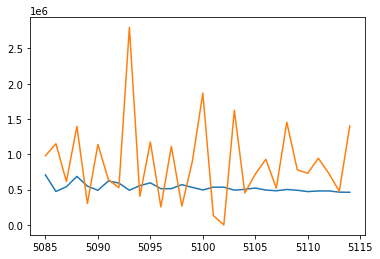

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3225.216, Time=0.22 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3212.071, Time=1.99 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3213.976, Time=5.80 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3231.486, Time=1.36 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3213.995, Time=2.80 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3215.976, Time=6.94 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3214.027, Time=4.86 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3215.995, Time=6.29 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3217.976, Time=6.89 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3198.116, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3195.243, Time=2.98 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3196.988, Time=7.64 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3195.121, Time=1.66 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3196.987, Time=5.36 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3198.989, Time=10.4

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3185.902, Time=6.32 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3202.092, Time=0.77 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3200.608, Time=4.13 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3202.356, Time=15.90 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3200.520, Time=4.56 sec
 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3202.346, Time=16.76 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3202.358, Time=14.70 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3203.767, Time=2.20 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3202.321, Time=12.13 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3202.233, Time=9.24 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3191.768, Time=5.60 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3205.981, Time=1.20 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3204.454, Time=4.44 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3204.363, Time=5.03 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3207.097, Time=2.78 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3206.909, Time=1.14 sec
Total fit time: 765.105 seconds


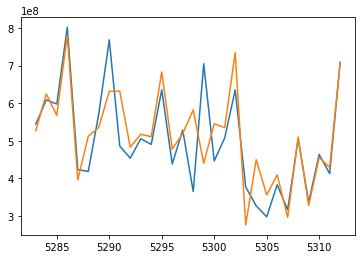

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4899.553, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4867.786, Time=0.66 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4862.876, Time=5.16 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4858.376, Time=0.67 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4860.371, Time=1.22 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4862.358, Time=5.68 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4860.362, Time=3.05 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4862.236, Time=19.66 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4864.219, Time=19.26 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4828.602, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4802.509, Time=0.62 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4798.876, Time=3.19 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4802.115, Time=0.53 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4801.525, Time=1.00 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4800.866, Time=5.40 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=4803.621, Time=3.75 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=4799.280, Time=14.12 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=4800.982, Time=22.35 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4809.754, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=4790.040, Time=0.82 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=4787.511, Time=4.22 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=4788.076, Time=0.76 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=4789.078, Time=0

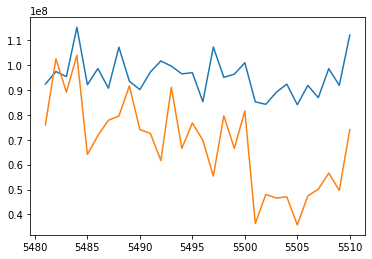

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3011.912, Time=0.30 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3000.837, Time=2.65 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3002.693, Time=6.05 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3024.367, Time=1.98 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3002.690, Time=6.18 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3004.693, Time=6.22 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3002.697, Time=4.14 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3004.689, Time=6.28 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3006.693, Time=7.99 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=2964.576, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=2964.564, Time=1.98 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=2966.504, Time=6.80 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=2964.536, Time=2.01 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=2966.504, Time=4.83 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=2968.504, Time=9.59

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(1,1,1)[52]             : AIC=2963.772, Time=21.79 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=2963.871, Time=11.93 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=2963.998, Time=1.02 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=2963.509, Time=5.79 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=2963.379, Time=4.53 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=3109.713, Time=1.52 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=2959.855, Time=0.40 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=2959.123, Time=2.39 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=2960.013, Time=12.07 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=2958.941, Time=2.28 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(1,1,1)[52]             : AIC=2959.907, Time=12.31 sec
 ARIMA(1,1,0)(1,1,2)[52]             : AIC=2962.014, Time=9.60 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=2960.014, Time=8.33 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=2962.014, Time=14.84 sec
 ARIMA(1,1,0)(2,1,2)[52]             : AIC=2964.014, Time=13.54 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=2961.873, Time=0.49 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=2960.583, Time=2.77 sec
 ARIMA(1,1,1)(0,1,2)[52]             : AIC=2961.576, Time=12.34 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=2960.387, Time=4.11 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=2961.057, Time=15.48 sec
 ARIMA(1,1,1)(1,1,2)[52]             : AIC=2963.577, Time=16.72 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=2961.578, Time=11.63 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=2963.578, Time=14.14 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=2967.695, Time=0.85 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=2966.021, Time=4.19 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=2966.893, Time=16.52 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=2965.812, Time=9.24 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=2965.016, Time=16.53 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=2966.898, Time=16.97 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=2967.146, Time=1.26 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=2966.090, Time=6.10 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=2965.907, Time=6.35 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=2968.086, Time=3.58 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=2961.784, Time=1.67 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=2960.634, Time=3.97 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=2961.554, Time=12.65 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=2960.434, Time=3.48 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=2961.221, Time=17.54 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=2963.555, Time=13.26 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=2961.556, Time=15.49 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=2963.555, Time=18.12 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=2964.822, Time=1.17 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=2963.463, Time=6.23 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=2964.390, Time=19.62 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=2963.265, Time=5.48 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=2963.389, Time=25.96 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=2964.393, Time=18.66 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=2969.528, Time=1.77 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=2968.004, Time=10.67 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=2967.801, Time=11.96 sec
 ARIMA(2,1,3)(0,1,0)[52]             : AIC=2952.194, Time=5.05 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=2964.335, Time=0.70 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=2963.240, Time=3.57 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=2964.335, Time=12.31 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=2963.069, Time=3.38 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=2963.244, Time=20.79 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=2964.338, Time=17.11 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=2965.890, Time=1.78 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=2964.908, Time=9.01 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=2964.740, Time=6.22 sec
 ARIMA(3,1,2)(0,1,0)[52]             : AIC=2968.939, Time=4.47 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=2967.998, Time=1.24 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=2966.884, Time=5.19 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=2966.699, Time=6.48 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=2961.742, Time=3.62 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=2968.354, Time=1.34 sec
Total fit time: 740.941 seconds


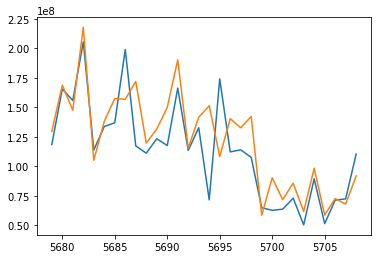

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5565.071, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5528.953, Time=1.67 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5520.721, Time=7.34 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5513.812, Time=0.37 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5515.656, Time=1.05 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5517.641, Time=6.99 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5515.622, Time=5.66 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5517.567, Time=3.79 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5519.503, Time=26.49 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5491.826, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5459.563, Time=0.85 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5452.483, Time=4.48 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5451.969, Time=0.86 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5453.137, Time=2.07 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5453.255, Time=6.98 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5453.952, Time=8.35 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5450.933, Time=18.60 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5452.918, Time=22.18 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5486.660, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5459.286, Time=0.89 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5453.529, Time=4.69 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5454.419, Time=1.06 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5455.261, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=5460.946, Time=22.38 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5485.447, Time=0.05 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5453.452, Time=0.95 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=5446.206, Time=4.61 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5442.896, Time=0.77 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=5444.735, Time=1.22 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=5445.808, Time=5.84 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=5444.879, Time=10.36 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=5444.157, Time=21.74 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=5486.081, Time=0.07 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=5455.391, Time=1.18 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=5448.494, Time=6.95 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=5446.331, Time=1.57 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=5447.988, Time=1.84 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=5450.227, Time=1

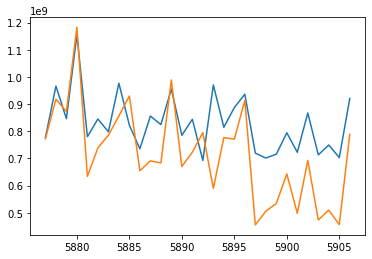

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=2925.279, Time=0.25 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=2914.716, Time=2.09 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=2916.724, Time=4.94 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=2928.698, Time=1.02 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=2916.715, Time=1.58 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=2918.724, Time=5.84 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=2916.711, Time=4.54 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=2918.711, Time=6.37 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=2920.724, Time=10.54 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=2898.912, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=2897.975, Time=1.82 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=2899.696, Time=7.60 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=2897.875, Time=1.78 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,1,1)[52]             : AIC=2899.185, Time=13.05 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=2901.698, Time=8.25 sec
 ARIMA(0,1,1)(2,1,0)[52]             : AIC=2899.699, Time=7.00 sec
 ARIMA(0,1,1)(2,1,1)[52]             : AIC=2901.699, Time=9.30 sec
 ARIMA(0,1,1)(2,1,2)[52]             : AIC=2903.699, Time=9.88 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=2901.661, Time=1.02 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=2929.183, Time=11.33 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=2921.590, Time=16.97 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=2901.159, Time=6.17 sec
 ARIMA(0,1,2)(1,1,1)[52]             : AIC=2902.597, Time=9.49 sec
 ARIMA(0,1,2)(1,1,2)[52]             : AIC=2918.580, Time=22.61 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=2902.957, Time=34.37 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=2904.547, Time=41.63 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3105.666, Time=0.73 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3034.214, Tim

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3034.888, Time=23.22 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3026.718, Time=16.13 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=2906.909, Time=2.55 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=2906.639, Time=4.26 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=2906.549, Time=3.59 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=2910.087, Time=1.05 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=2904.417, Time=0.36 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=2904.284, Time=1.65 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=2906.173, Time=9.03 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=2904.234, Time=1.84 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=2906.173, Time=4.30 sec
 ARIMA(1,1,0)(1,1,2)[52]             : AIC=2908.173, Time=11.01 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=2906.173, Time=7.90 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=2908.173, Time=9.14 sec
 ARIMA(1,1,0)(2,1,2)[52]             : AIC=2910.173, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=2900.754, Time=19.96 sec
 ARIMA(1,1,1)(1,1,2)[52]             : AIC=2903.295, Time=15.59 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=2901.296, Time=12.48 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=2903.296, Time=17.60 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=2903.615, Time=2.85 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=2901.341, Time=16.95 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=2902.809, Time=51.09 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=2901.162, Time=11.82 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=2900.937, Time=18.46 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=2902.821, Time=43.47 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=2906.321, Time=5.31 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=2905.940, Time=8.48 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=2905.859, Time=5.88 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=2908.168, Time=2.74 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=2900.929, Time=0.42 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=2901.007, Time=2.27 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=2902.650, Time=10.05 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=2900.927, Time=2.51 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=2902.027, Time=18.54 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=2904.651, Time=16.38 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=2902.653, Time=11.29 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=2904.652, Time=11.52 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=2902.121, Time=0.88 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=2901.840, Time=4.07 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=2903.584, Time=15.77 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=2901.763, Time=3.85 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=2902.819, Time=20.25 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=2903.587, Time=14.52 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=2904.737, Time=2.73 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=2903.166, Time=17.48 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=2903.012, Time=17.99 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,1,0)[52]             : AIC=2895.784, Time=5.42 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=2903.227, Time=0.56 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=2902.909, Time=3.40 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=2904.588, Time=16.83 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=2902.821, Time=4.82 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=2903.637, Time=20.40 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=2904.593, Time=11.51 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=2903.700, Time=1.10 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=2903.569, Time=5.52 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=2903.487, Time=5.75 sec
 ARIMA(3,1,2)(0,1,0)[52]             : AIC=2908.280, Time=3.00 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=2904.776, Time=0.75 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=2904.609, Time=3.51 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=2904.530, Time=7.23 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=2905.572, Time=4.15 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=2907.903, Time=1.28 sec
Total fit time: 922.701 seconds


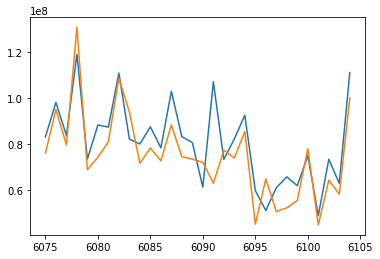

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3113.231, Time=0.41 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3095.966, Time=3.38 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3097.284, Time=8.16 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3105.606, Time=1.53 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3097.382, Time=4.07 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3099.283, Time=8.92 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3097.452, Time=5.39 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3099.361, Time=6.24 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3101.282, Time=7.62 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3085.325, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3115.756, Time=4.91 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3086.908, Time=33.99 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3076.603, Time=3.42 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3076.683, Time=10.25 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3078.434, Time=47.44 sec
 ARIMA(0,1,1)(2,1,0)[52]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(2,1,1)[52]             : AIC=inf, Time=nan sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(2,1,2)[52]             : AIC=3079.386, Time=62.41 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=3087.582, Time=0.44 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=3078.484, Time=2.59 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=3080.421, Time=12.77 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=3078.737, Time=2.46 sec
 ARIMA(0,1,2)(1,1,1)[52]             : AIC=3080.419, Time=5.01 sec
 ARIMA(0,1,2)(1,1,2)[52]             : AIC=3082.422, Time=12.03 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=3080.424, Time=8.27 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=3082.423, Time=12.88 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3087.169, Time=0.66 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3079.664, Time=4.40 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3081.624, Time=14.59 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=3079.861, Time=3.68 sec
 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3081.623, Time=8.25 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3081.627, Time

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3067.743, Time=7.28 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3087.789, Time=0.79 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3080.197, Time=4.55 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3082.153, Time=15.45 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3080.400, Time=3.44 sec
 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3082.152, Time=7.39 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3082.156, Time=13.72 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3090.310, Time=2.15 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3082.731, Time=4.23 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3082.929, Time=4.97 sec
 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3074.836, Time=6.45 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3091.136, Time=1.74 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3083.537, Time=5.71 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3083.747, Time=5.01 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3088.514, Time=3.

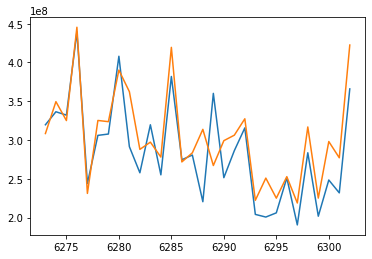

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3278.946, Time=0.18 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3266.048, Time=2.55 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3267.841, Time=6.70 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3270.659, Time=1.22 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3267.859, Time=4.29 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3269.841, Time=7.77 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3267.889, Time=4.65 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3269.859, Time=6.38 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3271.841, Time=6.45 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3250.328, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3247.188, Time=2.16 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3249.173, Time=8.67 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3247.177, Time=1.81 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3249.173, Time=5.02 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3251.173, Time=14.6

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(2,1,2)[52]             : AIC=3252.010, Time=53.13 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=3251.668, Time=0.43 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=3248.280, Time=2.60 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=3250.261, Time=11.07 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=3248.365, Time=2.26 sec
 ARIMA(0,1,2)(1,1,1)[52]             : AIC=3250.260, Time=5.80 sec
 ARIMA(0,1,2)(1,1,2)[52]             : AIC=3252.261, Time=15.57 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=3250.261, Time=10.92 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=3252.261, Time=15.14 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3249.393, Time=0.78 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3246.303, Time=4.94 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3248.097, Time=15.73 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=3246.488, Time=3.42 sec
 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3248.088, Time=8.29 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3248.099, Tim

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3248.388, Time=5.10 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3254.178, Time=1.19 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3250.064, Time=4.88 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3250.336, Time=5.17 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3252.814, Time=3.62 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3255.397, Time=1.39 sec
Total fit time: 807.127 seconds


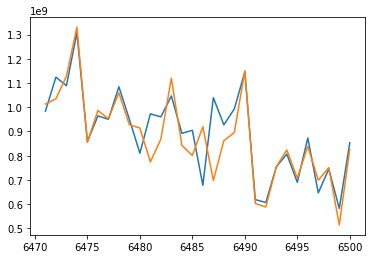

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3157.317, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3141.999, Time=2.71 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3143.668, Time=9.32 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3149.470, Time=1.25 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3143.716, Time=4.25 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3145.667, Time=7.82 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3143.776, Time=5.57 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3145.716, Time=7.28 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3147.667, Time=8.01 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3121.566, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3116.642, Time=3.03 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3117.910, Time=9.14 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3116.355, Time=2.34 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3116.283, Time=13.57 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3119.912, Time=9.62 sec
 ARIMA(0,1,1)(2,1,0)[52]             : AIC=3117.915, Time=6.13 sec
 ARIMA(0,1,1)(2,1,1)[52]             : AIC=3119.915, Time=9.38 sec
 ARIMA(0,1,1)(2,1,2)[52]             : AIC=3121.915, Time=10.76 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=3120.623, Time=0.44 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=3116.193, Time=2.37 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=3116.969, Time=9.69 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=3115.857, Time=2.69 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,1)[52]             : AIC=3114.179, Time=15.75 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,2)[52]             : AIC=3114.280, Time=51.75 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=3116.979, Time=9.51 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=3118.979, Time=12.26 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3123.561, Time=0.66 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3119.469, Time=3.99 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3119.597, Time=11.86 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=3119.082, Time=3.15 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3116.203, Time=20.76 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3119.613, Time=11.37 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=3137.082, Time=1.03 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=3132.516, Time=5.62 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=3132.059, Time=7.92 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=3153.012, Time=3.21 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=3110.773, Time=0.99 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=3108.288, Time=5.67 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=3108.445, Time=10.70 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=3107.964, Time=2.80 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(1,1,1)[52]             : AIC=3106.896, Time=14.59 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(1,1,2)[52]             : AIC=3108.129, Time=61.30 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=3108.454, Time=10.10 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=3110.454, Time=11.75 sec
 ARIMA(1,1,0)(2,1,2)[52]             : AIC=3112.452, Time=12.81 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=3127.135, Time=0.60 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=3123.021, Time=2.97 sec
 ARIMA(1,1,1)(0,1,2)[52]             : AIC=3122.427, Time=11.58 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=3122.583, Time=4.45 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=3117.714, Time=16.49 sec
 ARIMA(1,1,1)(1,1,2)[52]             : AIC=3112.877, Time=61.93 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=3122.455, Time=14.94 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=3124.454, Time=13.89 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=3153.536, Time=1.43 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3144.767, Time=9.08 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3158.848, Time=51.84 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3144.363, Time=8.35 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=3142.780, Time=21.25 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3145.734, Time=32.51 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3133.088, Time=1.28 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3128.980, Time=6.85 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3128.525, Time=6.61 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3146.366, Time=2.41 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=3119.446, Time=1.36 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=3116.080, Time=3.84 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=3115.869, Time=9.67 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=3115.696, Time=5.37 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=3112.681, Time=15.05 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,2)[52]             : AIC=3111.595, Time=59.37 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=3115.888, Time=17.18 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=3117.887, Time=14.30 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=3129.918, Time=0.83 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=3125.705, Time=5.36 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=3125.020, Time=17.65 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=3124.311, Time=15.54 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=3119.792, Time=22.65 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=3125.049, Time=18.14 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=3132.435, Time=1.95 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=3129.207, Time=11.10 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=3128.699, Time=13.35 sec
 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3123.356, Time=4.64 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3130.072, Time=1.29 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3125.877, Time=4.86 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3125.200, Time=19.37 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3125.430, Time=5.95 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3120.297, Time=26.28 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3125.231, Time=13.18 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3131.830, Time=0.90 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3127.658, Time=14.71 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3127.224, Time=4.52 sec
 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3115.262, Time=4.08 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3138.976, Time=0.99 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3134.360, Time=5.23 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3133.872, Time=6.56 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3140.808, Time=1.45 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3137.672, Time=1.28 sec
Total fit time: 1032.101 seconds


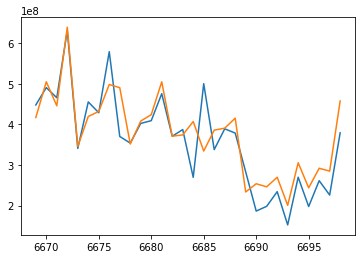

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5044.677, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5007.324, Time=0.74 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5000.978, Time=7.13 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4995.706, Time=0.59 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4997.706, Time=1.69 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4999.697, Time=6.77 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4997.705, Time=3.27 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4999.559, Time=19.41 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5001.556, Time=20.57 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4977.653, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4943.827, Time=0.74 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4938.352, Time=3.89 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4940.379, Time=0.80 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4940.225, Time=1.10 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4940.005, Time=5.63 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=4941.931, Time=4.44 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=4938.102, Time=18.29 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=4939.839, Time=26.33 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4970.302, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=4944.286, Time=0.90 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=4940.496, Time=3.92 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=4940.576, Time=0.97 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=4941.542, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=4942.532, Time=23.42 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=4944.527, Time=22.04 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=4970.111, Time=0.03 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=4937.195, Time=0.91 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=4931.919, Time=5.16 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=4930.325, Time=0.95 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=4931.715, Time=1.30 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=4932.754, Time=6.65 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=4932.258, Time=4.06 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=4931.294, Time=21.58 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=4969.048, Time=0.11 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=4938.267, Time=1.34 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=4933.554, Time=8.20 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=4931.529, Time=1.44 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=4933.063, Time=3.15 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=4933.474, Time=9.

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(2,0,1)[52] intercept   : AIC=4940.356, Time=28.35 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=4974.938, Time=0.06 sec
 ARIMA(2,1,1)(0,0,1)[52] intercept   : AIC=4930.361, Time=1.13 sec
 ARIMA(2,1,1)(0,0,2)[52] intercept   : AIC=4922.903, Time=7.45 sec
 ARIMA(2,1,1)(1,0,0)[52] intercept   : AIC=4922.355, Time=1.40 sec
 ARIMA(2,1,1)(1,0,1)[52] intercept   : AIC=4923.143, Time=1.54 sec
 ARIMA(2,1,1)(2,0,0)[52] intercept   : AIC=4924.157, Time=6.26 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=4971.036, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=4940.268, Time=1.54 sec
 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=4933.109, Time=2.08 sec
 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=4969.534, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=4951.215, Time=0.06 sec
 ARIMA(3,1,0)(0,0,1)[52] intercept   : AIC=4918.143, Time=1.16 sec
 ARIMA(3,1,0)(0,0,2)[52] intercept   : AIC=4913.104, Time=5.33 sec
 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=4909.461, Time=1.1

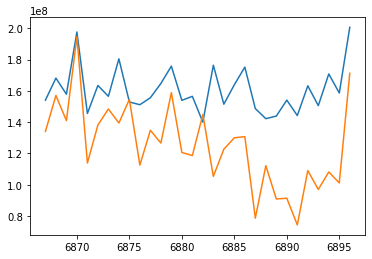

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5302.124, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5267.537, Time=0.68 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5263.029, Time=4.43 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5258.651, Time=0.37 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5260.642, Time=0.98 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5262.630, Time=4.83 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5260.631, Time=2.52 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5262.520, Time=10.35 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5264.496, Time=20.19 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5234.192, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5208.513, Time=0.85 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5205.258, Time=4.55 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5205.768, Time=0.74 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5206.647, Time=1.30 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5207.048, Time=6.37 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5207.643, Time=3.47 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5205.549, Time=20.78 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5207.513, Time=23.39 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5224.711, Time=0.05 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5202.881, Time=1.30 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5200.191, Time=4.68 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5199.062, Time=0.80 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5200.711, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=5190.172, Time=21.36 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5220.282, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5190.675, Time=0.86 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=5186.033, Time=4.75 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5182.891, Time=0.84 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=5184.863, Time=1.57 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=5186.342, Time=6.96 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=5184.847, Time=4.11 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=5185.504, Time=23.38 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=5218.597, Time=0.07 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=5190.230, Time=1.42 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=5185.893, Time=6.12 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=5183.404, Time=1.17 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=5185.289, Time=1.98 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=5185.392, Time=6.

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=5225.333, Time=0.45 sec
 ARIMA(4,1,0)(0,0,0)[52] intercept   : AIC=5212.357, Time=0.07 sec
 ARIMA(4,1,0)(0,0,1)[52] intercept   : AIC=5182.657, Time=1.44 sec
 ARIMA(4,1,0)(1,0,0)[52] intercept   : AIC=5174.458, Time=1.41 sec
 ARIMA(4,1,1)(0,0,0)[52] intercept   : AIC=5197.421, Time=0.30 sec
 ARIMA(5,1,0)(0,0,0)[52] intercept   : AIC=5207.377, Time=0.09 sec
Total fit time: 342.444 seconds


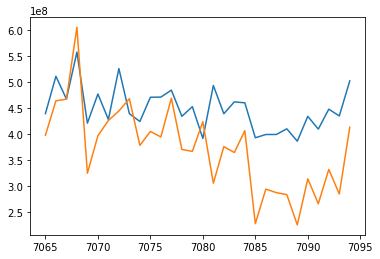

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3219.403, Time=0.23 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3208.665, Time=2.08 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3209.850, Time=9.17 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3284.926, Time=1.30 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3209.965, Time=8.43 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3211.850, Time=7.93 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3209.864, Time=4.95 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3211.851, Time=7.82 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3213.850, Time=8.01 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3181.124, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3182.043, Time=2.14 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3183.499, Time=8.48 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3182.087, Time=1.77 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3182.453, Time=11.24 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3185.499, Time=9.1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3180.749, Time=19.01 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3181.592, Time=15.71 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=3182.418, Time=0.97 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=3183.473, Time=6.95 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=3183.500, Time=5.47 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=3186.179, Time=1.31 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=3174.646, Time=0.46 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=3175.950, Time=4.49 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=3177.725, Time=12.94 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=3175.969, Time=2.68 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=3177.127, Time=12.34 sec
 ARIMA(1,1,0)(1,1,2)[52]             : AIC=3179.725, Time=14.18 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=3177.725, Time=13.62 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=3179.725, Time=16.30 sec
 ARIMA(1,1,0)(2,1,2)[52]             : AIC=3181.725, Ti

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=3183.449, Time=32.38 sec
 ARIMA(1,1,1)(1,1,2)[52]             : AIC=3187.242, Time=28.86 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=3185.243, Time=20.01 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=3187.243, Time=21.02 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=3185.583, Time=0.99 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3186.467, Time=4.75 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3188.072, Time=18.75 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3186.502, Time=3.13 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=3186.144, Time=18.22 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3188.072, Time=16.80 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3185.513, Time=1.49 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3185.757, Time=8.96 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3185.830, Time=8.20 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3194.429, Time=1.93 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=3179.045, Time=0.60 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=3180.045, Time=3.88 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=3181.678, Time=11.49 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=3180.078, Time=3.21 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=3180.422, Time=16.87 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=3183.678, Time=12.20 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=3181.678, Time=14.94 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=3183.678, Time=17.70 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=3185.774, Time=1.38 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=3186.654, Time=6.94 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=3188.253, Time=23.05 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=3186.689, Time=6.85 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=3179.505, Time=24.30 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=3188.253, Time=19.76 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=3181.887, Time=1.62 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=3182.325, Time=8.99 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=3182.384, Time=10.41 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3152.154, Time=5.50 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3185.965, Time=0.65 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3186.841, Time=3.63 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3188.431, Time=12.81 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3186.876, Time=4.12 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3186.444, Time=19.06 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3188.431, Time=19.34 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3187.797, Time=0.98 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3188.671, Time=5.26 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3188.708, Time=4.52 sec
 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3184.565, Time=1.21 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3189.160, Time=0.91 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3189.980, Time=4.66 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3190.019, Time=6.26 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3190.695, Time=3.81 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3186.800, Time=1.11 sec
Total fit time: 829.583 seconds


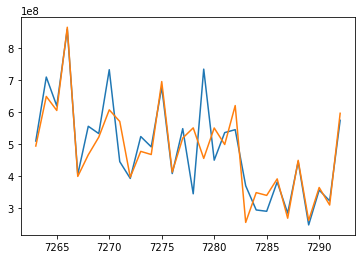

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4994.674, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4960.540, Time=0.68 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4954.497, Time=5.51 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4949.011, Time=0.53 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4950.822, Time=0.98 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4952.805, Time=6.95 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4950.786, Time=4.00 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4952.748, Time=5.52 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4954.692, Time=20.85 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4917.246, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4886.334, Time=0.69 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4881.091, Time=4.07 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4883.490, Time=0.60 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4883.614, Time=1.17 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4882.880, Time=6.49 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=4885.320, Time=5.52 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=4880.725, Time=21.42 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=4882.583, Time=20.36 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4907.661, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=4882.043, Time=0.98 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=4878.208, Time=4.55 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=4882.004, Time=0.90 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=4881.402, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=4890.728, Time=21.32 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=4906.631, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=4876.697, Time=0.86 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=4871.488, Time=5.56 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=4870.412, Time=0.71 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=4871.867, Time=1.40 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=4872.472, Time=7.08 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=4872.409, Time=5.24 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=4870.731, Time=19.89 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=4908.254, Time=0.08 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=4877.865, Time=1.17 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=4872.547, Time=6.55 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=4873.001, Time=1.51 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=4873.957, Time=2.09 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=4874.962, Time=9.

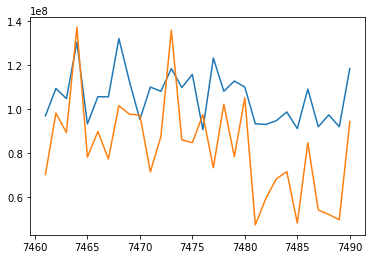

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3130.092, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3119.093, Time=2.02 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3121.098, Time=8.29 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3145.353, Time=2.21 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3121.091, Time=4.09 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3123.098, Time=6.70 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3121.095, Time=4.90 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3123.091, Time=11.66 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3125.098, Time=8.05 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3090.324, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3090.960, Time=2.68 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3092.813, Time=9.18 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3090.929, Time=2.04 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3092.809, Time=5.60 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3094.813, Time=9.8

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,1)[52]             : AIC=3095.059, Time=16.04 sec
 ARIMA(0,1,2)(1,1,2)[52]             : AIC=3098.012, Time=11.66 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=3096.012, Time=9.96 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=3098.012, Time=10.94 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3094.244, Time=0.73 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3095.063, Time=4.27 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3096.726, Time=15.42 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=3095.025, Time=3.59 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3095.778, Time=19.75 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3096.726, Time=10.47 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=3094.926, Time=0.85 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=3095.914, Time=4.80 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=3095.881, Time=7.10 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=3098.556, Time=1.73 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=3090.487, Time=0.49 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=3091.853, Time=2.30 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=3093.548, Time=7.42 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=3091.832, Time=3.08 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(1,1,1)[52]             : AIC=3093.424, Time=13.24 sec
 ARIMA(1,1,0)(1,1,2)[52]             : AIC=3095.548, Time=9.78 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=3093.548, Time=10.23 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=3095.548, Time=10.41 sec
 ARIMA(1,1,0)(2,1,2)[52]             : AIC=3097.548, Time=12.35 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=3091.587, Time=0.63 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=3092.399, Time=3.82 sec
 ARIMA(1,1,1)(0,1,2)[52]             : AIC=3094.151, Time=12.15 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=3092.365, Time=3.61 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=3093.684, Time=21.64 sec
 ARIMA(1,1,1)(1,1,2)[52]             : AIC=3096.151, Time=20.44 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=3094.151, Time=27.61 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=3096.151, Time=14.29 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=3093.122, Time=2.19 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3092.567, Time=16.87 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3094.294, Time=50.67 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3092.493, Time=14.24 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=3093.179, Time=21.27 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3094.292, Time=50.36 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3093.551, Time=6.25 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3093.128, Time=19.59 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3093.043, Time=19.18 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3092.419, Time=5.10 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=3091.979, Time=0.51 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=3092.997, Time=2.82 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=3094.720, Time=10.94 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=3092.966, Time=4.32 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=3094.328, Time=19.31 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=3096.720, Time=16.20 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=3094.720, Time=12.46 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=3096.720, Time=11.96 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=3092.803, Time=1.24 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=3093.674, Time=6.45 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=3095.382, Time=22.18 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=3093.638, Time=8.45 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=3094.920, Time=17.78 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=3095.382, Time=20.71 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=3092.203, Time=1.97 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=3092.137, Time=10.93 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=3092.048, Time=11.65 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3092.442, Time=4.84 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3093.400, Time=0.59 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3094.392, Time=3.23 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3096.106, Time=12.17 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3094.360, Time=4.35 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3095.564, Time=24.44 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3096.106, Time=12.75 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3094.495, Time=1.15 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3095.468, Time=6.45 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3095.434, Time=5.18 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3096.937, Time=4.47 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3094.540, Time=0.97 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3095.550, Time=3.91 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3095.518, Time=5.07 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3086.988, Time=3.20 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3097.622, Time=2.16 sec
Total fit time: 894.355 seconds


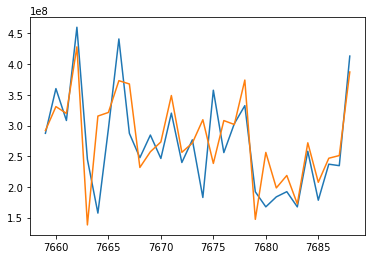

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3173.149, Time=0.22 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3161.473, Time=2.45 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3162.913, Time=5.73 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3207.385, Time=1.10 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3162.946, Time=9.84 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3164.913, Time=12.88 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3162.945, Time=6.31 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3164.923, Time=7.33 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3166.913, Time=7.96 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3142.471, Time=0.39 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3141.386, Time=2.33 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3142.087, Time=8.53 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3141.217, Time=3.17 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3139.931, Time=16.38 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3144.089, Time=10.55 sec
 ARIMA(0,1,1)(2,1,0)[52]             : AIC=3142.095, Time=8.46 sec
 ARIMA(0,1,1)(2,1,1)[52]             : AIC=3144.095, Time=8.55 sec
 ARIMA(0,1,1)(2,1,2)[52]             : AIC=3140.652, Time=47.17 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=3151.983, Time=0.50 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=3150.396, Time=3.04 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=3150.722, Time=12.08 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=3150.196, Time=3.41 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,1)[52]             : AIC=3146.757, Time=16.46 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,2)[52]             : AIC=3142.264, Time=50.45 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=3150.738, Time=13.84 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=3146.677, Time=56.94 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3148.796, Time=0.80 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3147.754, Time=4.17 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3148.235, Time=17.34 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=3147.581, Time=3.91 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3145.086, Time=27.34 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3148.245, Time=11.48 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=3160.775, Time=0.92 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=3159.182, Time=5.74 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=3158.981, Time=4.55 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=3160.235, Time=1.05 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=3135.495, Time=0.40 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=3135.376, Time=1.98 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=3136.383, Time=8.89 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=3135.259, Time=2.21 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(1,1,1)[52]             : AIC=3135.587, Time=12.30 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(1,1,2)[52]             : AIC=3137.218, Time=53.80 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=3136.385, Time=10.07 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=3138.385, Time=15.25 sec
 ARIMA(1,1,0)(2,1,2)[52]             : AIC=3140.385, Time=13.17 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=3145.602, Time=0.73 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=3144.529, Time=5.56 sec
 ARIMA(1,1,1)(0,1,2)[52]             : AIC=3145.084, Time=11.15 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=3144.356, Time=3.96 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=3142.239, Time=18.88 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,2)[52]             : AIC=3140.796, Time=60.31 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=3145.094, Time=25.04 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=3147.094, Time=20.56 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=3157.140, Time=0.84 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3155.485, Time=5.35 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3155.739, Time=18.64 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3155.283, Time=5.19 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=3151.115, Time=18.00 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3155.757, Time=14.98 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3151.843, Time=1.48 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3150.706, Time=6.92 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3150.530, Time=9.65 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3166.882, Time=1.84 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=3139.913, Time=0.70 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=3139.334, Time=3.62 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=3140.142, Time=10.63 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=3139.189, Time=2.69 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=3138.554, Time=19.87 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=3142.144, Time=13.91 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=3140.147, Time=18.71 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=3142.147, Time=15.99 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=3148.789, Time=1.11 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=3147.605, Time=6.14 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=3148.120, Time=20.88 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=3147.427, Time=5.79 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=3145.196, Time=20.35 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=3148.131, Time=22.26 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=3158.982, Time=1.59 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=3157.366, Time=8.81 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=3157.165, Time=10.47 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3153.746, Time=6.84 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3147.505, Time=0.70 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3146.412, Time=3.95 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3147.026, Time=15.23 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3146.242, Time=6.39 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3144.128, Time=24.44 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3147.037, Time=12.21 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3150.651, Time=0.91 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3149.495, Time=7.17 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3149.321, Time=10.51 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3145.203, Time=6.33 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3155.443, Time=1.42 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3154.180, Time=5.28 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3153.992, Time=6.40 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3151.744, Time=9.32 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3161.386, Time=1.64 sec
Total fit time: 1042.996 seconds


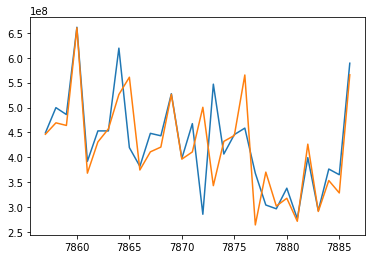

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3386.017, Time=0.29 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3374.308, Time=3.91 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3375.968, Time=5.54 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3423.155, Time=1.61 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3375.976, Time=5.63 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3377.968, Time=8.93 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3375.992, Time=6.40 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3377.974, Time=7.14 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3379.968, Time=8.08 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3356.606, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3355.087, Time=2.11 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3356.016, Time=7.63 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3354.879, Time=1.88 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3353.610, Time=14.28 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3358.019, Time=8.62 sec
 ARIMA(0,1,1)(2,1,0)[52]             : AIC=3356.025, Time=6.87 sec
 ARIMA(0,1,1)(2,1,1)[52]             : AIC=3358.025, Time=8.24 sec
 ARIMA(0,1,1)(2,1,2)[52]             : AIC=3360.023, Time=10.85 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=3358.352, Time=0.45 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=3356.889, Time=2.60 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=3357.750, Time=9.38 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=3356.680, Time=3.19 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,1)[52]             : AIC=3355.238, Time=15.18 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,2)[52]             : AIC=3355.194, Time=64.37 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=3357.760, Time=11.75 sec
 ARIMA(0,1,2)(2,1,1)[52]             : AIC=3356.726, Time=55.67 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3357.461, Time=0.85 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3356.165, Time=6.29 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3356.925, Time=16.54 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=3355.951, Time=8.33 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3354.807, Time=18.54 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3356.935, Time=18.39 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,4)(0,1,0)[52]             : AIC=4069.912, Time=5.32 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=3853.596, Time=20.65 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,4)(1,1,0)[52]             : AIC=4054.556, Time=17.98 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=3367.315, Time=1.26 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=3351.033, Time=0.43 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=3350.481, Time=2.27 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=3351.451, Time=8.70 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=3350.319, Time=2.02 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(1,1,1)[52]             : AIC=3350.376, Time=16.68 sec
 ARIMA(1,1,0)(1,1,2)[52]             : AIC=3353.452, Time=14.83 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=3351.455, Time=9.21 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=3353.455, Time=11.84 sec
 ARIMA(1,1,0)(2,1,2)[52]             : AIC=3355.454, Time=14.32 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=3361.225, Time=0.64 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=3359.669, Time=3.74 sec
 ARIMA(1,1,1)(0,1,2)[52]             : AIC=3360.322, Time=14.64 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=3359.448, Time=5.24 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=3357.021, Time=21.03 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,2)[52]             : AIC=3355.393, Time=61.28 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=3360.336, Time=12.54 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=3362.335, Time=15.77 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=3365.094, Time=0.81 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3363.360, Time=6.21 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3363.865, Time=15.02 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3363.126, Time=4.38 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,1,1)[52]             : AIC=3359.895, Time=18.86 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3363.883, Time=14.86 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3361.485, Time=1.11 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3359.837, Time=5.62 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3359.589, Time=5.84 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3367.357, Time=1.40 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=3355.460, Time=0.50 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=3354.567, Time=2.79 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=3355.422, Time=10.52 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=3354.384, Time=2.44 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,1)[52]             : AIC=3353.594, Time=19.10 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(1,1,2)[52]             : AIC=3354.408, Time=66.89 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=3355.429, Time=10.20 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=3357.429, Time=11.80 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=3367.673, Time=1.23 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=3365.586, Time=9.20 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=3365.983, Time=23.23 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=3365.326, Time=10.59 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=3361.598, Time=17.73 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=3366.004, Time=25.74 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=3366.009, Time=1.10 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=3364.228, Time=6.15 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=3363.985, Time=8.04 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3340.413, Time=6.20 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3364.260, Time=0.71 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3362.271, Time=3.70 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3362.634, Time=13.01 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3362.015, Time=4.82 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3358.424, Time=25.39 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3362.658, Time=13.19 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3366.057, Time=1.51 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3364.057, Time=7.72 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3363.797, Time=10.51 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3359.479, Time=4.74 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3373.672, Time=1.10 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3371.149, Time=4.58 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3370.853, Time=4.80 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3374.900, Time=1.13 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3373.862, Time=1.85 sec
Total fit time: 1007.155 seconds


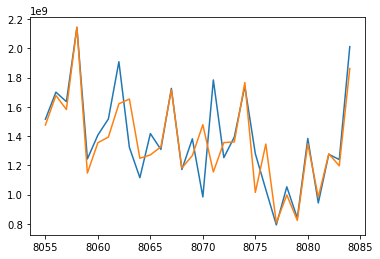

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5189.360, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5158.043, Time=0.68 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5151.850, Time=7.63 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5146.764, Time=0.80 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5148.731, Time=1.97 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5150.699, Time=6.56 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5148.700, Time=6.14 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5150.533, Time=8.85 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5152.477, Time=22.21 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5128.573, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5095.223, Time=0.63 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5089.263, Time=3.37 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5094.624, Time=0.62 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5092.885, Time=1.03 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5091.194, Time=5.56 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5095.845, Time=7.22 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5089.262, Time=18.54 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5090.766, Time=28.27 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5118.158, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5091.498, Time=0.91 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5087.288, Time=4.13 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5089.331, Time=1.20 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5089.451, Time=1

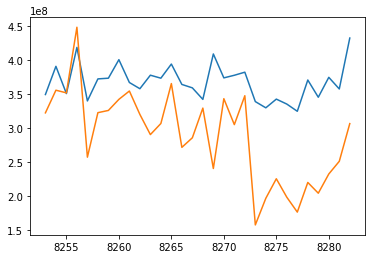

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5548.121, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5512.599, Time=0.86 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=5504.929, Time=4.69 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5498.682, Time=0.43 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=5500.627, Time=0.86 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=5502.621, Time=4.63 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=5500.613, Time=2.28 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=5502.563, Time=3.28 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=5504.523, Time=20.80 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5477.646, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5444.372, Time=0.77 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=5437.399, Time=3.82 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5436.938, Time=0.71 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5437.883, Time=1.03 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=5438.192, Time=4.76 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=5438.845, Time=2.91 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=5436.068, Time=14.26 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=5438.013, Time=14.34 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=5470.098, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=5445.491, Time=0.89 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=5440.869, Time=4.16 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=5439.848, Time=0.96 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=5441.240, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=5445.772, Time=22.85 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5471.117, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5438.438, Time=0.81 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=5431.404, Time=4.30 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5428.006, Time=0.91 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=5429.768, Time=1.23 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=5431.041, Time=6.24 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=5430.005, Time=4.04 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=5429.581, Time=18.13 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=5470.812, Time=0.09 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=5442.019, Time=1.53 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=5436.039, Time=9.76 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=5432.990, Time=2.07 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=5434.793, Time=2.08 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=5434.990, Time=7.

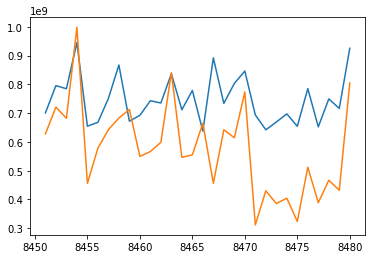

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4779.645, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4748.458, Time=0.63 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4742.360, Time=4.00 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4737.099, Time=0.44 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4738.885, Time=0.87 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4740.865, Time=4.76 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4738.846, Time=2.91 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4740.811, Time=3.47 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4742.756, Time=21.05 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4711.102, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4682.058, Time=0.69 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4676.661, Time=3.48 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4677.953, Time=0.48 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4678.757, Time=1.00 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4678.243, Time=5.16 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=4679.929, Time=2.93 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=4676.186, Time=13.33 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=4678.175, Time=22.85 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4705.444, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=4682.231, Time=0.90 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=4678.313, Time=4.52 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=4679.401, Time=0.79 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=4680.433, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=4685.319, Time=22.41 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=4704.302, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=4676.436, Time=0.96 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=4671.233, Time=3.99 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=4669.304, Time=0.86 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=4671.182, Time=1.49 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=4671.926, Time=5.82 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=4671.216, Time=6.31 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=4670.572, Time=23.64 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=4705.058, Time=0.12 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=4678.350, Time=1.96 sec
 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=4673.447, Time=10.13 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=4672.020, Time=2.22 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=4673.795, Time=3.18 sec
 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=4673.976, Time=1

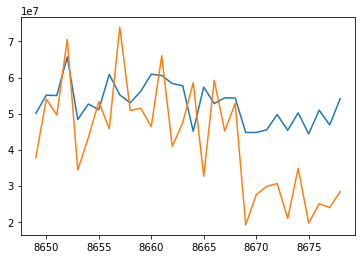

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3244.439, Time=0.38 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3226.764, Time=2.31 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3228.344, Time=5.32 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3228.667, Time=1.13 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3228.422, Time=3.15 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3230.344, Time=6.38 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3228.511, Time=4.49 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3230.421, Time=6.81 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3232.344, Time=7.19 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3230.810, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3219.313, Time=1.97 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3220.236, Time=9.54 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3218.786, Time=1.80 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3220.232, Time=5.87 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3219.471, Time=46.15 sec
 ARIMA(0,1,1)(2,1,0)[52]             : AIC=3220.243, Time=7.99 sec
 ARIMA(0,1,1)(2,1,1)[52]             : AIC=3222.237, Time=10.83 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(2,1,2)[52]             : AIC=3221.478, Time=56.93 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=3234.236, Time=0.45 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=3221.189, Time=2.97 sec
 ARIMA(0,1,2)(0,1,2)[52]             : AIC=3221.631, Time=13.22 sec
 ARIMA(0,1,2)(1,1,0)[52]             : AIC=3220.487, Time=2.70 sec
 ARIMA(0,1,2)(1,1,1)[52]             : AIC=3221.613, Time=7.33 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,1,2)[52]             : AIC=3219.960, Time=48.70 sec
 ARIMA(0,1,2)(2,1,0)[52]             : AIC=3221.643, Time=9.40 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(2,1,1)[52]             : AIC=3221.579, Time=51.30 sec
 ARIMA(0,1,3)(0,1,0)[52]             : AIC=3234.746, Time=0.62 sec
 ARIMA(0,1,3)(0,1,1)[52]             : AIC=3222.127, Time=4.02 sec
 ARIMA(0,1,3)(0,1,2)[52]             : AIC=3222.540, Time=16.49 sec
 ARIMA(0,1,3)(1,1,0)[52]             : AIC=3221.423, Time=3.52 sec
 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3222.520, Time=12.78 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3222.550, Time=12.46 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=3244.047, Time=1.09 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=3228.177, Time=5.20 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=3227.386, Time=8.68 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=3245.362, Time=1.78 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=3222.272, Time=0.79 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=3213.488, Time=3.62 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=3214.394, Time=8.47 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=3212.977, Time=

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,2)[52]             : AIC=3219.481, Time=57.04 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=3219.942, Time=15.70 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=3221.941, Time=23.23 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=3238.475, Time=0.67 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3225.923, Time=3.75 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3226.751, Time=13.31 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3225.356, Time=3.19 sec
 ARIMA(1,1,2)(1,1,1)[52]             : AIC=3226.745, Time=7.91 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3226.760, Time=14.67 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3236.397, Time=1.61 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3223.367, Time=8.48 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3222.631, Time=8.85 sec
 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3246.215, Time=3.26 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=3227.037, Time=0.50 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=3216.746, Time

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3240.265, Time=4.33 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3235.801, Time=0.90 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3222.698, Time=4.50 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3221.999, Time=4.50 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3237.571, Time=2.86 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3238.292, Time=1.55 sec
Total fit time: 987.841 seconds


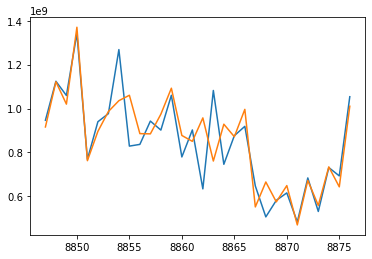

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3150.223, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3139.176, Time=2.25 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=3140.872, Time=9.10 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=3184.854, Time=1.55 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=3140.874, Time=6.93 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=3142.872, Time=7.48 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=3140.880, Time=4.18 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=3142.870, Time=9.00 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=3144.872, Time=13.07 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3097.903, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3098.932, Time=2.56 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3100.667, Time=11.41 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3098.969, Time=3.23 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3100.521, Time=17.11 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=3102.667, Time=1

/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,3)(1,1,1)[52]             : AIC=3091.338, Time=19.35 sec
 ARIMA(0,1,3)(2,1,0)[52]             : AIC=3091.720, Time=10.79 sec
 ARIMA(0,1,4)(0,1,0)[52]             : AIC=3089.793, Time=0.83 sec
 ARIMA(0,1,4)(0,1,1)[52]             : AIC=3091.051, Time=4.92 sec
 ARIMA(0,1,4)(1,1,0)[52]             : AIC=3091.090, Time=6.66 sec
 ARIMA(0,1,5)(0,1,0)[52]             : AIC=3090.074, Time=1.82 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=3084.925, Time=0.76 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=3086.210, Time=4.52 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=3087.799, Time=11.93 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=3086.242, Time=3.28 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(1,1,1)[52]             : AIC=3087.239, Time=17.19 sec
 ARIMA(1,1,0)(1,1,2)[52]             : AIC=3089.799, Time=15.15 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=3087.800, Time=11.96 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=3089.799, Time=17.45 sec
 ARIMA(1,1,0)(2,1,2)[52]             : AIC=3091.799, Time=19.84 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=3091.058, Time=0.58 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=3092.092, Time=4.17 sec
 ARIMA(1,1,1)(0,1,2)[52]             : AIC=3093.476, Time=15.35 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=3092.138, Time=3.93 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,1,1)[52]             : AIC=3091.698, Time=16.34 sec
 ARIMA(1,1,1)(1,1,2)[52]             : AIC=3095.476, Time=13.24 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=3093.477, Time=11.40 sec
 ARIMA(1,1,1)(2,1,1)[52]             : AIC=3095.477, Time=15.33 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=3092.123, Time=0.71 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3093.217, Time=6.91 sec
 ARIMA(1,1,2)(0,1,2)[52]             : AIC=3094.571, Time=13.26 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=3093.261, Time=4.09 sec
 ARIMA(1,1,2)(1,1,1)[52]             : AIC=3092.999, Time=19.81 sec
 ARIMA(1,1,2)(2,1,0)[52]             : AIC=3094.572, Time=13.73 sec
 ARIMA(1,1,3)(0,1,0)[52]             : AIC=3093.050, Time=1.09 sec
 ARIMA(1,1,3)(0,1,1)[52]             : AIC=3094.174, Time=5.96 sec
 ARIMA(1,1,3)(1,1,0)[52]             : AIC=3094.216, Time=4.93 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,4)(0,1,0)[52]             : AIC=3106.852, Time=7.62 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=3088.446, Time=0.56 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=3089.587, Time=3.11 sec
 ARIMA(2,1,0)(0,1,2)[52]             : AIC=3090.982, Time=12.69 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=3089.629, Time=3.29 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=3089.760, Time=15.86 sec
 ARIMA(2,1,0)(1,1,2)[52]             : AIC=3092.982, Time=17.40 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=3090.983, Time=12.23 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=3092.983, Time=13.81 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=3088.290, Time=2.39 sec
 ARIMA(2,1,1)(0,1,1)[52]             : AIC=3089.177, Time=12.90 sec
 ARIMA(2,1,1)(0,1,2)[52]             : AIC=3090.490, Time=44.18 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=3089.235, Time=13.71 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(1,1,1)[52]             : AIC=3088.921, Time=21.50 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=3090.491, Time=45.49 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=3089.301, Time=2.76 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=3090.229, Time=12.50 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=3090.285, Time=13.49 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,1,0)[52]             : AIC=3069.528, Time=5.53 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=3092.844, Time=0.77 sec
 ARIMA(3,1,0)(0,1,1)[52]             : AIC=3093.942, Time=3.66 sec
 ARIMA(3,1,0)(0,1,2)[52]             : AIC=3095.241, Time=12.84 sec
 ARIMA(3,1,0)(1,1,0)[52]             : AIC=3093.986, Time=8.82 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,0)(1,1,1)[52]             : AIC=3093.536, Time=22.20 sec
 ARIMA(3,1,0)(2,1,0)[52]             : AIC=3095.243, Time=12.80 sec
 ARIMA(3,1,1)(0,1,0)[52]             : AIC=3095.299, Time=0.83 sec
 ARIMA(3,1,1)(0,1,1)[52]             : AIC=3096.369, Time=4.60 sec
 ARIMA(3,1,1)(1,1,0)[52]             : AIC=3096.415, Time=5.78 sec
 ARIMA(3,1,2)(0,1,0)[52]             : AIC=3091.445, Time=4.27 sec
 ARIMA(4,1,0)(0,1,0)[52]             : AIC=3096.006, Time=1.19 sec
 ARIMA(4,1,0)(0,1,1)[52]             : AIC=3097.043, Time=5.21 sec
 ARIMA(4,1,0)(1,1,0)[52]             : AIC=3097.091, Time=9.37 sec
 ARIMA(4,1,1)(0,1,0)[52]             : AIC=3097.763, Time=2.27 sec
 ARIMA(5,1,0)(0,1,0)[52]             : AIC=3095.356, Time=1.57 sec
Total fit time: 907.363 seconds


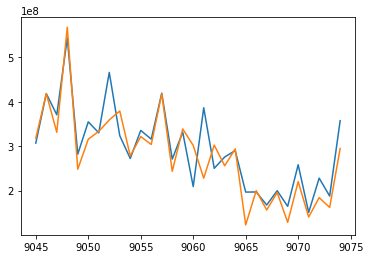

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4621.789, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=4589.748, Time=0.81 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=4586.432, Time=4.82 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=4582.653, Time=0.59 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=4584.642, Time=1.22 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=4586.637, Time=6.81 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=4584.636, Time=3.09 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=4586.584, Time=11.79 sec


/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=4588.569, Time=22.61 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4537.901, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4515.512, Time=0.81 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=4513.370, Time=4.04 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4516.214, Time=0.77 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=4516.019, Time=1.26 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=4515.310, Time=6.06 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=4517.919, Time=3.76 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=4514.019, Time=16.61 sec
 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=4515.847, Time=28.96 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4526.456, Time=0.05 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=4512.621, Time=1.35 sec
 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=4511.555, Time=4.60 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=4513.755, Time=0.83 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=4513.988, Time=1

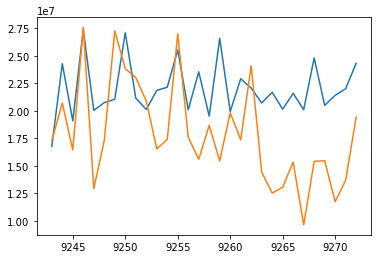

,state,rmse
0,AK,1.521789e+07
1,AL,2.323108e+07
2,AR,1.684515e+07
3,AZ,7.326779e+07
4,CA,7.296775e+08


In [5]:
state = []
rmse = []
for i in df.state.unique().tolist():
    train,val,test = create_each_state(i)
    arima_model = arimamodel(train.total_value)
    predictions = arima_model.predict(30)
    plt.plot(val.index,predictions)
    plt.plot(val.total_value)
    plt.show()
    rms = np.sqrt(mean_squared_error(val.total_value,predictions))
    state.append(i)
    rmse.append(rms)

data_s_arima = {'state': state, 'rmse': rmse}
df_arima = pd.DataFrame(data=data_s_arima)
df_arima.head()

In [ ]:
df_arima = pd.read_csv("arima_prediction.csv")